# PISA Dataset Exploration
## by Ellen Zhang

## Preliminary Wrangling


PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.


Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

Reference:

- [PISA Data Visualization Competition](http://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm)

- [PISA 2012 Technical report](http://www.oecd.org/pisa/data/pisa2012technicalreport.htm)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
df_dict = pd.read_csv('./dataset/pisadict2012.csv',encoding='cp1252')
# df_dict

In [5]:
print(df_dict.shape)
print(df_dict.dtypes) 

(635, 2)
Unnamed: 0    object
x             object
dtype: object


In [6]:
df_pisa = pd.read_csv('./dataset/pisa2012.csv',encoding='cp1252', low_memory=False)
# df_pisa.sample(5)

In [7]:
df_pisa.shape

(485490, 636)

In [8]:
df_pisa.dtypes.head()

Unnamed: 0     int64
CNT           object
SUBNATIO       int64
STRATUM       object
OECD          object
dtype: object

In [9]:
df_pisa.dtypes[df_pisa.dtypes != 'object'].shape

(268,)

In [10]:
df_pisa.dtypes[df_pisa.dtypes == 'object'].shape

(368,)

In [11]:
category =df_pisa.dtypes[df_pisa.dtypes == 'object']
df_category_column = category.index

In [12]:
df_category=pd.DataFrame(columns=['column_name','category_values'])
# print(df_category)
for column in df_category_column:
    category_values = df_pisa[column].dropna().unique().tolist()
    category_values.sort()
#     print(type(category_values))
    category_values = ','.join(str(cv) for cv in category_values)
#     print(column, (category_values))
    df_category = df_category.append({'column_name':column, 'category_values':category_values}, ignore_index=True)

In [13]:
df_category[4:]

,column_name,category_values
4,ST04Q01,"Female,Male"
5,ST05Q01,"No ,Yes, for more than one year,Yes, for one year or less"
6,ST07Q01,"No, never,Yes, once,Yes, twice or more"
7,ST07Q02,"No, never,Yes, once,Yes, twice or more"
8,ST07Q03,"No, never,Yes, once,Yes, twice or more"
9,ST08Q01,"Five or more times ,None ,One or two times ,Three or four times"
10,ST09Q01,"Five or more times ,None ,One or two times ,Three or four times"
11,ST11Q01,"No,Yes"
12,ST11Q02,"No,Yes"
13,ST11Q03,"No,Yes"


In [14]:
df_cate_counts = df_category.groupby(['category_values'])['category_values'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)
df_cate_counts.head(10)

,category_values,count
17,"Agree,Disagree,Strongly agree,Strongly disagree",98
49,"No,Yes",29
22,"Almost every day,Every day,Never or hardly ever,Once or twice a month,Once or twice a week",26
29,"Every Lesson,Most Lessons,Never or Hardly Ever,Some Lessons",23
50,"No,Yes, and I use it,Yes, but I don’t use it",18
33,"Frequently,Never ,Rarely ,Sometimes",17
23,"Always or almost always,Never or rarely,Often,Sometimes",17
35,"Heard of it a few times,Heard of it often,Heard of it once or twice,Know it well, understand the concept,Never heard of it",16
47,"No, never,Yes",13
44,"Mostly like me,Not at all like me,Not much like me,Somewhat like me,Very much like me",10


In [15]:
# Change certain columns data type from numeric data type to str
df_pisa['Unnamed: 0'] = df_pisa['Unnamed: 0'].astype(str)
df_pisa.SUBNATIO = df_pisa.SUBNATIO.astype(str)
df_pisa.SCHOOLID = df_pisa.SCHOOLID.astype(str)
df_pisa.STIDSTD = df_pisa.STIDSTD.astype(str)
df_pisa.ST01Q01 = df_pisa.ST01Q01.astype(str)
df_pisa.ST02Q01 = df_pisa.ST02Q01.astype(str)
df_pisa.ST03Q01 = df_pisa.ST03Q01.astype(str)
df_pisa.ST03Q02 = df_pisa.ST03Q02.astype(str)
df_pisa.ST06Q01 = df_pisa.ST06Q01.astype(str)

In [16]:
# descriptive statistics for numeric variables
print(df_pisa.describe())

            ST115Q01       ST21Q01       ST26Q15       ST26Q16       ST26Q17  \
count  479269.000000  32728.000000  4.854900e+05  4.854900e+05  4.854900e+05   
mean        1.265356      6.481117  7.103064e+05  7.268785e+05  8.130810e+05   
std         0.578992      4.579245  1.583832e+06  1.629829e+06  1.811846e+06   
min         1.000000      0.000000  8.001000e+03  8.001000e+03  8.001000e+03   
25%         1.000000      2.000000  2.030020e+05  2.080010e+05  2.080010e+05   
50%         1.000000      6.000000  4.400010e+05  4.400010e+05  4.400010e+05   
75%         1.000000     10.000000  7.030020e+05  7.030020e+05  7.040020e+05   
max         4.000000     16.000000  9.999999e+06  9.999999e+06  9.999999e+06   

             ST57Q01        ST57Q02        ST57Q03        ST57Q04  \
count  301367.000000  269808.000000  283813.000000  279657.000000   
mean        5.493770       1.623629       0.954044       0.911821   
std         5.383815       2.591569       2.162574       2.362377   
min

### What is the structure of your dataset?

> There are 485490 observers in the dataset with 636 features . 259 of variables are numeric, but 368 of variables are catogories.
For example:
- 98 columns has category values: Agree,Disagree,Strongly agree,Strongly disagree
- 29 columns has category values: No,Yes
- ....


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are most influence the average of students' math performance. Math performance includes columns from `PV1MACC` to `PV5MACU`.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that student's own `Math Behaviour`, will have the strongest effect on their math grade: the more they do, the higher the grade. I also think that student's atitude to math(`Math Anxiety`) will have effects on the grade, though to a much smaller degree than the main effect of `Math Behaviour`.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

I'll start by looking at the distribution of the main variable of interest: ***Student Math Performance*** in short **AMP**.

In [17]:
# Get students average math performance from columns 506 to 526
amp = df_pisa.iloc[:,506:526].mean(axis=1)

In [18]:
df_amp=pd.DataFrame(amp)
df_amp.shape

(485490, 1)

In [19]:
df_pisa['AMP'] = df_amp
df_pisa['AMP'].head()

0    356.09908
1    409.37841
2    522.63592
3    543.97881
4    391.81337
Name: AMP, dtype: float64

In [20]:
# Normalize the math performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normal_amp = scaler.fit_transform(df_amp)

In [21]:
df_pisa['AMP_Normal']=pd.DataFrame(df_normal_amp)

In [22]:
df_pisa['AMP_Normal'].sample(10)

87368     0.463408
405279    0.737755
149626    0.515474
269883    0.460056
402552    0.417872
75718     0.455267
436060    0.638804
304016    0.605501
377989    0.332590
449929    0.441293
Name: AMP_Normal, dtype: float64

In [23]:
df_pisa['AMP'].mean()

467.7584077590791

In [24]:
df_pisa['AMP'].std()

102.83583068902882

In [25]:
df_pisa['AMP'].median()

463.74825

In [26]:
df_pisa['AMP'].max()

935.9012250000002

In [27]:
df_pisa['AMP'].min()

41.25642500000001

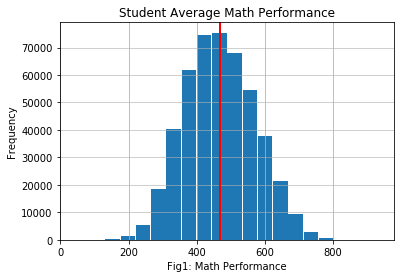

In [28]:
df_pisa['AMP'].plot.hist(grid=True, bins=20, rwidth=0.95)
plt.axvline(df_pisa['AMP'].mean(), color='r',  linewidth=2)
plt.title('Student Average Math Performance')
plt.xlabel('Fig1: Math Performance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

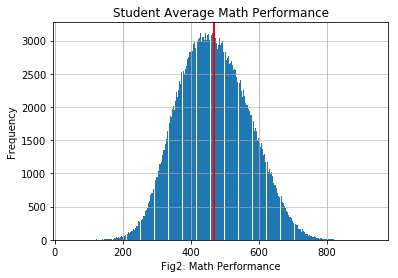

In [29]:
# small binsize
df_pisa['AMP'].plot.hist(grid=True, bins=500, rwidth=0.95)
plt.axvline(df_pisa['AMP'].mean(), color='r',  linewidth=2)
plt.title('Student Average Math Performance')
plt.xlabel('Fig2: Math Performance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

Student Average Math Performance has a normal distribution. The mean of the total 485,490 students math performance is about 468. The data points spread out over 103. 

Text(0.5, 0, 'Fig3: quarters, mean, outliers')

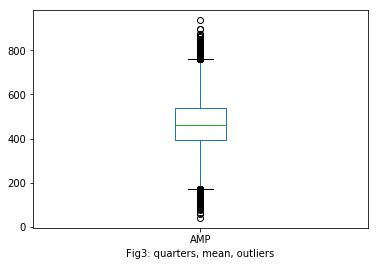

In [30]:
df_pisa['AMP'].plot.box()
plt.xlabel('Fig3: quarters, mean, outliers')


From above average math performance box plot we can see that there are a lot outliers. We can guess that math performance in some contries are much better than the average math performance, some are worse than the average math performance. I am interested in the match performance in China mainland and New Zealand. So next step, I will look into these two contries.

In [31]:
# Slicing interest of data (category data)
df_bahaviour_anxiety = df_pisa[['ST42Q01','ST42Q03','ST42Q05','ST42Q08','ST42Q10','ST49Q01', \
                                'ST49Q02', 'ST49Q03', 'ST49Q04', 'ST49Q05', 'ST49Q06', 'ST49Q07','ST49Q09' ]]

In [32]:
# Extract columns name
behavours_columns=df_dict[df_dict['x'].str.contains("Math Behaviour")].x.str.replace("Math Behaviour - ","").tolist()
print(behavours_columns)
print()

anxiety_columns=df_dict[df_dict['x'].str.contains("Math Anxiety")].x.str.replace("Math Anxiety - ","").tolist()
print(anxiety_columns)
print()

columns = anxiety_columns + behavours_columns 
print(columns)

['Talk about Maths with Friends', 'Help Friends with Maths', '<Extracurricular> Activity', 'Participate in Competitions', 'Study More Than 2 Extra Hours a Day', 'Play Chess', 'Computer programming', 'Participate in Math Club']

['Worry That It Will Be Difficult', 'Get Very Tense', 'Get Very Nervous', 'Feel Helpless', 'Worry About Getting Poor <Grades>']

['Worry That It Will Be Difficult', 'Get Very Tense', 'Get Very Nervous', 'Feel Helpless', 'Worry About Getting Poor <Grades>', 'Talk about Maths with Friends', 'Help Friends with Maths', '<Extracurricular> Activity', 'Participate in Competitions', 'Study More Than 2 Extra Hours a Day', 'Play Chess', 'Computer programming', 'Participate in Math Club']


In [33]:
# Rename the columns, make them meaningful
df_bahaviour_anxiety.columns=columns
print(df_bahaviour_anxiety.columns)
df_bahaviour_anxiety.sample(3)

Index(['Worry That It Will Be Difficult', 'Get Very Tense', 'Get Very Nervous',
       'Feel Helpless', 'Worry About Getting Poor <Grades>',
       'Talk about Maths with Friends', 'Help Friends with Maths',
       '<Extracurricular> Activity', 'Participate in Competitions',
       'Study More Than 2 Extra Hours a Day', 'Play Chess',
       'Computer programming', 'Participate in Math Club'],
      dtype='object')


,Worry That It Will Be Difficult,Get Very Tense,Get Very Nervous,Feel Helpless,Worry About Getting Poor <Grades>,Talk about Maths with Friends,Help Friends with Maths,<Extracurricular> Activity,Participate in Competitions,Study More Than 2 Extra Hours a Day,Play Chess,Computer programming,Participate in Math Club
307321,Agree,Agree,Agree,Disagree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120692,Disagree,Disagree,Agree,Disagree,Strongly agree,Sometimes,Always or almost always,Often,Often,Always or almost always,Always or almost always,Sometimes,Sometimes
94267,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Often,Often,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely


In [34]:
# Slicing iod (numeric data) and merge into IOD dataframe

df_amp = df_pisa[['AMP','AMP_Normal','MATBEH', 'ANXMAT', 'CNT']]
df_iod = pd.concat([df_amp, df_bahaviour_anxiety], axis=1, sort=False)
print(df_iod.head())
df_iod.to_csv('./dataset/pisa_iod.csv', index=False)

         AMP  AMP_Normal  MATBEH  ANXMAT      CNT  \
0  356.09908    0.351919  0.6426    0.32  Albania   
1  409.37841    0.411473  1.4702     NaN  Albania   
2  522.63592    0.538068  0.9618     NaN  Albania   
3  543.97881    0.561924     NaN    0.31  Albania   
4  391.81337    0.391839  1.8169    1.02  Albania   

  Worry That It Will Be Difficult Get Very Tense Get Very Nervous  \
0                           Agree          Agree            Agree   
1                             NaN            NaN              NaN   
2                             NaN            NaN              NaN   
3                             NaN       Disagree            Agree   
4                  Strongly agree          Agree   Strongly agree   

  Feel Helpless Worry About Getting Poor <Grades>  \
0      Disagree                          Disagree   
1           NaN                               NaN   
2           NaN                               NaN   
3      Disagree                             Agree   
4

In [35]:
df_iod.shape

(485490, 18)

In [36]:
# Check the area or country 
area = df_pisa['CNT'].unique()
area

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [37]:
# Describe the statistics 
area_amp = []
sta_area_amp = []
for i in range(len(area)):
    cnt = area[i]    
    df_area = df_pisa.query('CNT == @cnt')
    print(cnt)
    print(df_area['AMP'].describe())
    
    print()
    df_area['AMP'].replace('NaN',np.nan, inplace=True)
    area_amp.append(df_area['AMP'])

Albania
count    4743.000000
mean      395.075261
std        88.025595
min        90.130870
25%       340.968223
50%       396.876465
75%       453.583117
max       685.628620
Name: AMP, dtype: float64

United Arab Emirates
count    11500.000000
mean       430.039293
std         87.806157
min        151.433240
25%        365.796851
50%        424.645583
75%        488.606089
max        788.565205
Name: AMP, dtype: float64



d:\Anaconda3\envs\dand\lib\site-packages\pandas\core\generic.py:6576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Argentina
count    5908.000000
mean      392.991001
std        79.046386
min        58.708530
25%       340.160060
50%       391.832837
75%       446.280580
max       676.709760
Name: AMP, dtype: float64

Australia
count    14481.000000
mean       492.369205
std         97.396684
min         82.205180
25%        423.710855
50%        491.244730
75%        559.947020
max        816.100635
Name: AMP, dtype: float64

Austria
count    4755.000000
mean      506.323752
std        89.473597
min       191.548530
25%       443.145357
50%       506.317185
75%       570.813205
max       767.533875
Name: AMP, dtype: float64

Belgium
count    8597.000000
mean      517.726299
std       101.754342
min       165.960430
25%       448.909495
50%       522.207500
75%       592.584525
max       823.773170
Name: AMP, dtype: float64

Bulgaria
count    5282.000000
mean      441.439142
std        91.023947
min       155.888770
25%       375.630945
50%       437.342263
75%       503.883009
max       738.323715

New Zealand
count    4291.000000
mean      500.150343
std        98.668303
min       176.164500
25%       427.741863
50%       497.242555
75%       569.196917
max       796.549310
Name: AMP, dtype: float64

Peru
count    6035.000000
mean      364.495059
std        81.861031
min       134.082420
25%       308.194425
50%       359.448520
75%       415.843587
max       669.348805
Name: AMP, dtype: float64

Poland
count    4607.000000
mean      520.101554
std        88.859698
min       257.680330
25%       456.056240
50%       516.793900
75%       583.081480
max       794.290395
Name: AMP, dtype: float64

Portugal
count    5722.000000
mean      483.964455
std        92.546466
min       129.895620
25%       417.751980
50%       484.506937
75%       551.057401
max       754.330895
Name: AMP, dtype: float64

Qatar
count    10966.000000
mean       373.753460
std         96.274322
min        108.319055
25%        304.650261
50%        359.837978
75%        434.538094
max        730.261720
Name:

In [38]:
plt.rcParams["figure.figsize"] = [30, 20]

d:\Anaconda3\envs\dand\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
d:\Anaconda3\envs\dand\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
d:\Anaconda3\envs\dand\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
d:\Anaconda3\envs\dand\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
d:\Anaconda3\envs\dand\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


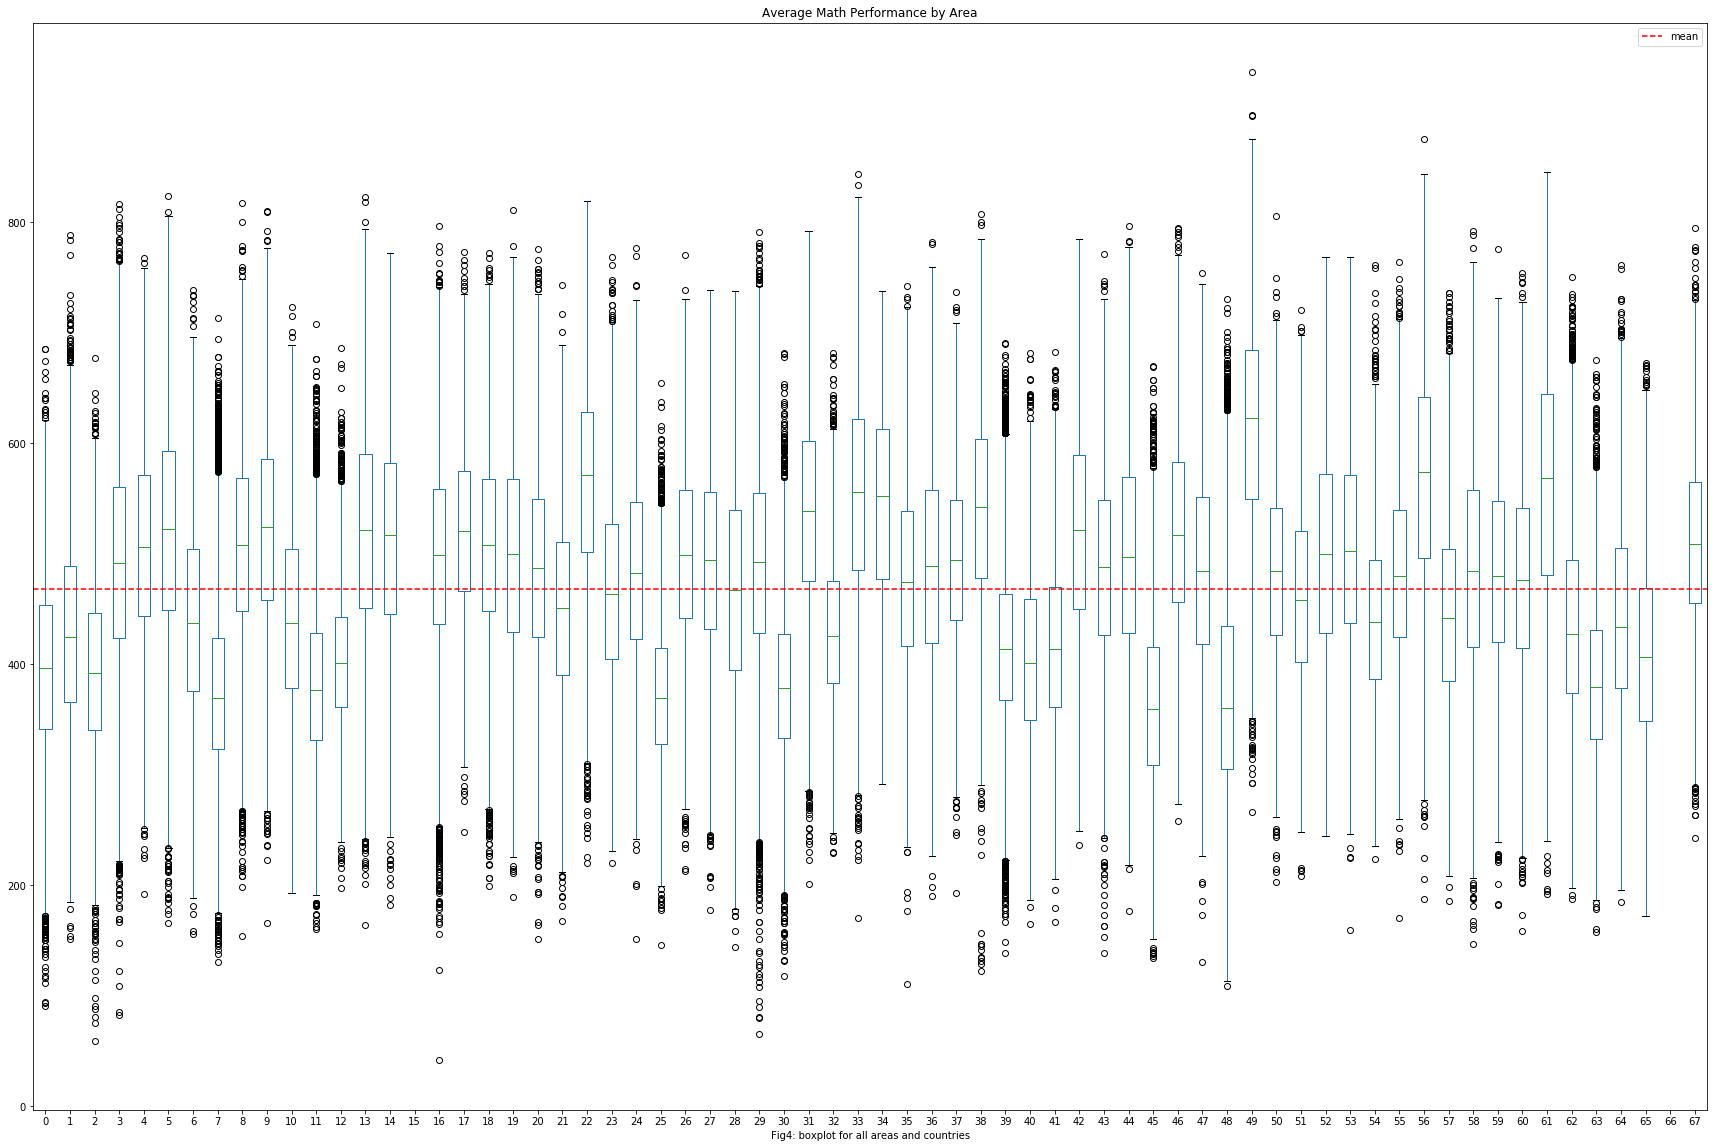

In [39]:
data = pd.concat(area_amp, axis=1, sort=False)
data.columns = range(0,len(area))
# plt.axhline(df_china['AMP'].mean(), color='y',  linewidth=2)
ax = data.plot.box()
ax.axhline(y= df_pisa['AMP'].mean(),color='r', ls='--', label='mean')
ax.set_title('Average Math Performance by Area')
plt.xlabel('Fig4: boxplot for all areas and countries')

plt.legend()
plt.savefig('./images/amp_all.png')

From above box plot we can see that the area or country which have the best math performance is ShangHai-China. 

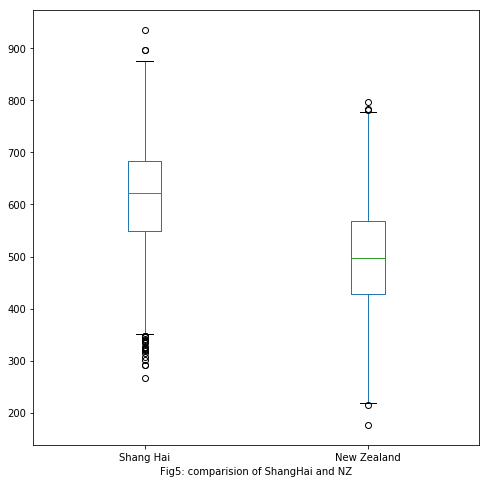

In [40]:
# Just compared Shanghai-China and New Zealand

plt.rcParams["figure.figsize"] = [8, 8]

area_sh_nz=[area_amp[49], area_amp[44]]
df_sh_nz = pd.concat(area_sh_nz, axis=1, sort=False)
df_sh_nz.columns = ['Shang Hai','New Zealand']

ax= df_sh_nz.plot.box()
plt.xlabel('Fig5: comparision of ShangHai and NZ')

plt.savefig('./images/sh_nz.png')

I compared the average math performance between Shanghai China and New Zealand. Math performance in Shanghai is much higher than New Zealand. But from the above box plot we can see that there are a lot outlier under Q4 in Shanghai, less outliers in New Zealand. Math education in New Zealand is averaged.

## Below I will take Shanghai-China and New Zealand as examples to find out the relationship between Math-realated features and good math performance which lies in Q1.

In [41]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [42]:
df_iod = pd.read_csv('./dataset/pisa_iod.csv')

In [43]:
# I am more interested in top 25% students situation, so get this part of data
df_china = df_iod.query('CNT=="China-Shanghai"')
df_ch_top25 = df_china.query('AMP > 684')

In [44]:
df_nz = df_iod.query('CNT=="New Zealand"')
df_nz_top25 = df_nz.query('AMP > 570')

467.7584077590791 612.6337001245895 727.962561126161
115.32886100157145


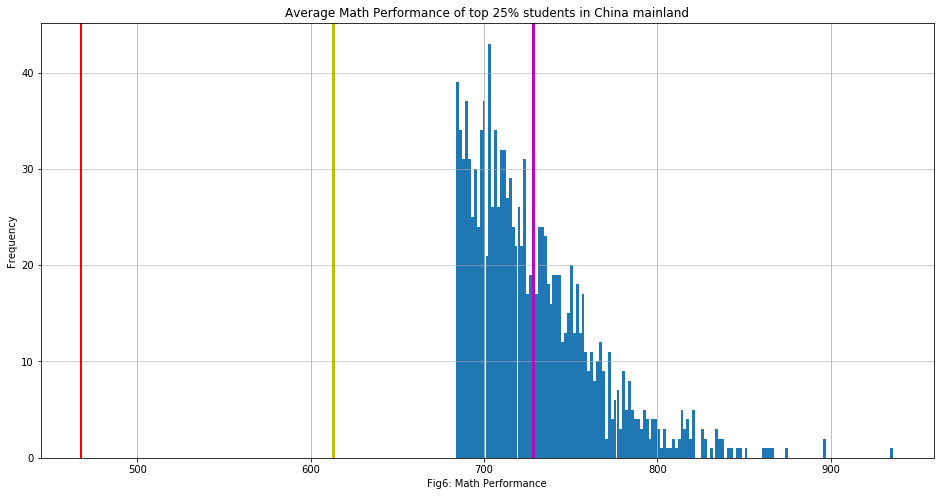

In [45]:
# Plot the average math grade of top 25% students compared to the mean of the whole and the mean of China

plt.rcParams["figure.figsize"] = [16, 8]


df_ch_top25['AMP'].plot.hist(grid=True, bins=150, rwidth=0.99)
plt.axvline(df_iod['AMP'].mean(), color='r',  linewidth=2)
plt.axvline(df_china['AMP'].mean(), color='y',  linewidth=3)
plt.axvline(df_ch_top25['AMP'].mean(), color='m',  linewidth=3)

plt.title('Average Math Performance of top 25% students in China mainland')
plt.xlabel('Fig6: Math Performance')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)
plt.savefig('./images/china_top25.png')

# red line stands for the mean of math performance among the whole students
# yellow line stands for the mean of math performance in ShangHai China.
# magenta line stands for the mean of top 25% math performance in ShangHai China

print(df_iod['AMP'].mean(), df_china['AMP'].mean(), df_ch_top25['AMP'].mean())
print(df_ch_top25['AMP'].mean() - df_china['AMP'].mean())

467.7584077590791 500.1503432952691 628.8327818515037
128.68243855623456


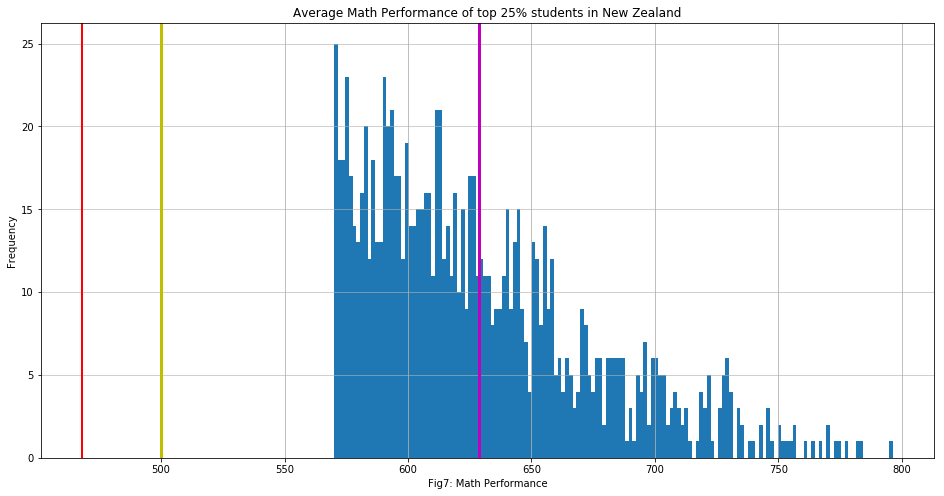

In [46]:
# Plot the average math grade of top 25% students compared to the mean of the whole and the mean of New Zealand

df_nz_top25['AMP'].plot.hist(grid=True, bins=150, rwidth=0.99)
plt.axvline(df_iod['AMP'].mean(), color='r',  linewidth=2)
plt.axvline(df_nz['AMP'].mean(), color='y',  linewidth=3)
plt.axvline(df_nz_top25['AMP'].mean(), color='m',  linewidth=3)

plt.title('Average Math Performance of top 25% students in New Zealand')
plt.xlabel('Fig7: Math Performance')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)
plt.savefig('./images/nz_top25.png')
# red line stands for the mean of math performance among the whole students
# yellow line stands for the mean of math performance in New Zealand
# magenta line stands for the mean of top 25% math performance in New Zealand
print(df_iod['AMP'].mean(), df_nz['AMP'].mean(), df_nz_top25['AMP'].mean())
print( df_nz_top25['AMP'].mean() - df_nz['AMP'].mean())

Compared with fig6 and fig7, we can see that the math performance difference between the mean of the top 25% of students and the mean of the whole population in New Zealand is wider than in China. And New Zealand has a longer and wider tail than China. That means Chinese students are generally good, but there are not many especially excellent students among Chinese students. In New Zealand, there are more standout students among their peers. The competition between Chinese students is very stressful.

In [47]:
df_ch_top25.head(1)

,AMP,AMP_Normal,MATBEH,ANXMAT,CNT,Worry That It Will Be Difficult,Get Very Tense,Get Very Nervous,Feel Helpless,Worry About Getting Poor <Grades>,Talk about Maths with Friends,Help Friends with Maths,<Extracurricular> Activity,Participate in Competitions,Study More Than 2 Extra Hours a Day,Play Chess,Computer programming,Participate in Math Club
400218,754.01932,0.796699,1.0998,-2.37,China-Shanghai,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Often,Often,Never or rarely,Sometimes,Often,Sometimes,Never or rarely,Sometimes


In [48]:
# Seprated the math anxiety columns and math behaviour columns into defferent dataframe in oder to easy plot and compare them later

df_ch_anxiety = df_ch_top25.iloc[:, 5:10]
df_ch_anxiety.dropna(inplace=True)
df_nz_anxiety = df_nz_top25.iloc[:, 5:10]
df_nz_anxiety.dropna(inplace=True)

print(df_ch_anxiety.head(2))
print()
print(df_nz_anxiety.head(2))


       Worry That It Will Be Difficult     Get Very Tense   Get Very Nervous  \
400218               Strongly disagree  Strongly disagree  Strongly disagree   
400220                  Strongly agree           Disagree           Disagree   

            Feel Helpless Worry About Getting Poor <Grades>  
400218  Strongly disagree                 Strongly disagree  
400220           Disagree                    Strongly agree  

       Worry That It Will Be Difficult Get Very Tense Get Very Nervous  \
368600                        Disagree       Disagree         Disagree   
368605                        Disagree       Disagree            Agree   

       Feel Helpless Worry About Getting Poor <Grades>  
368600      Disagree                          Disagree  
368605         Agree                             Agree  


In [49]:
# Convert math anxiety into ordered categorical types

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['Strongly disagree','Disagree','Agree','Strongly agree'])
df_ch_anxiety = df_ch_anxiety.astype(ordered_var)
df_nz_anxiety = df_nz_anxiety.astype(ordered_var)

In [50]:
df_ch_anxiety=pd.DataFrame(df_ch_anxiety)
df_nz_anxiety=pd.DataFrame(df_nz_anxiety)

In [51]:
df_ch_anxiety.head()

,Worry That It Will Be Difficult,Get Very Tense,Get Very Nervous,Feel Helpless,Worry About Getting Poor <Grades>
400218,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
400220,Strongly agree,Disagree,Disagree,Disagree,Strongly agree
400222,Agree,Agree,Strongly agree,Agree,Strongly agree
400223,Strongly agree,Agree,Agree,Disagree,Agree
400225,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Disagree


In [52]:
anxiety_columns = df_ch_anxiety.columns.tolist()

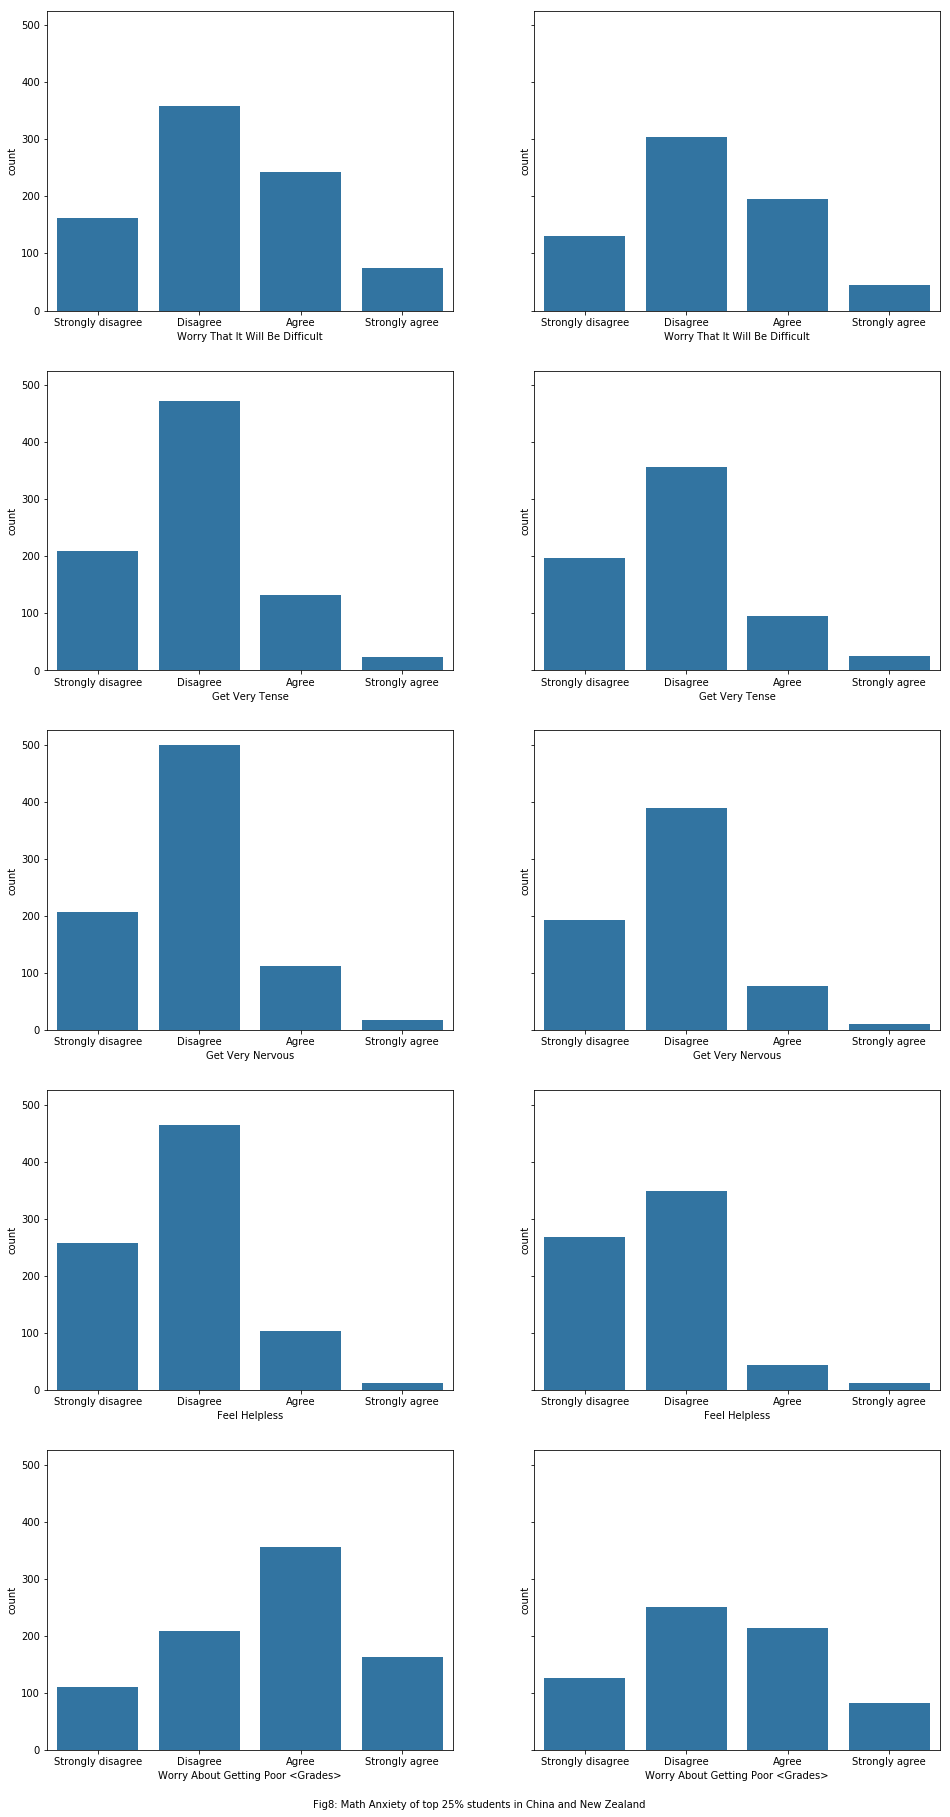

<Figure size 1152x576 with 0 Axes>

In [60]:
# Plat and compare math anxiety of top 25% students in two different country

fig, ax = plt.subplots(nrows=5,ncols=2,sharey=True, figsize = [16,32])

default_color = sns.color_palette()[0]
sns.countplot(data = df_ch_anxiety, x = anxiety_columns[0], color = default_color, ax = ax[0,0])
sns.countplot(data = df_ch_anxiety, x = anxiety_columns[1], color = default_color, ax = ax[1,0])
sns.countplot(data = df_ch_anxiety, x = anxiety_columns[2], color = default_color, ax = ax[2,0])
sns.countplot(data = df_ch_anxiety, x = anxiety_columns[3], color = default_color, ax = ax[3,0])
sns.countplot(data = df_ch_anxiety, x = anxiety_columns[4], color = default_color, ax = ax[4,0])
sns.countplot(data = df_nz_anxiety, x = anxiety_columns[0], color = default_color, ax = ax[0,1])
sns.countplot(data = df_nz_anxiety, x = anxiety_columns[1], color = default_color, ax = ax[1,1])
sns.countplot(data = df_nz_anxiety, x = anxiety_columns[2], color = default_color, ax = ax[2,1])
sns.countplot(data = df_nz_anxiety, x = anxiety_columns[3], color = default_color, ax = ax[3,1])
sns.countplot(data = df_nz_anxiety, x = anxiety_columns[4], color = default_color, ax = ax[4,1])

fig.text(0.5, 0.1, 'Fig8: Math Anxiety of top 25% students in China and New Zealand', ha='center')

plt.show()
plt.savefig('./images/anxiety_cn_nz.png')

To math anxiety, most of the top 25% students disagree that they have anxiety on 4 aspects(Worry That It Will Be Difficult, Get Very Tense, Get Very Nervous, Feel Helpless) in both of two countries. But on 'Worry About Getting Poor' aspect, most of the students in China worried about getting poor grades. It indicates that Chinese students have more pressures and worries about their grades, but New Zealand students more enjoy math studying.

In [61]:
df_ch_behaviour = df_ch_top25.iloc[:, -8:]
df_ch_behaviour.dropna(inplace=True)
df_nz_behaviour = df_nz_top25.iloc[:,-8:]
df_nz_behaviour.dropna(inplace=True)

print(df_ch_behaviour.head(2))
print()
print(df_nz_behaviour.head(2))

       Talk about Maths with Friends Help Friends with Maths  \
400218                         Often                   Often   
400221                         Often         Never or rarely   

       <Extracurricular> Activity Participate in Competitions  \
400218            Never or rarely                   Sometimes   
400221                      Often                       Often   

       Study More Than 2 Extra Hours a Day Play Chess Computer programming  \
400218                               Often  Sometimes      Never or rarely   
400221                           Sometimes      Often      Never or rarely   

       Participate in Math Club  
400218                Sometimes  
400221          Never or rarely  

       Talk about Maths with Friends Help Friends with Maths  \
368605                     Sometimes               Sometimes   
368608               Never or rarely                   Often   

       <Extracurricular> Activity Participate in Competitions  \
368605         

In [62]:
# Convert math behaviour into ordered categorical types
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['Never or rarely','Sometimes','Often', 'Always or almost always'])
df_ch_behaviour = df_ch_behaviour.astype(ordered_var)
df_nz_behaviour = df_nz_behaviour.astype(ordered_var)

In [63]:
behavours_columns = df_nz_behaviour.columns.tolist()

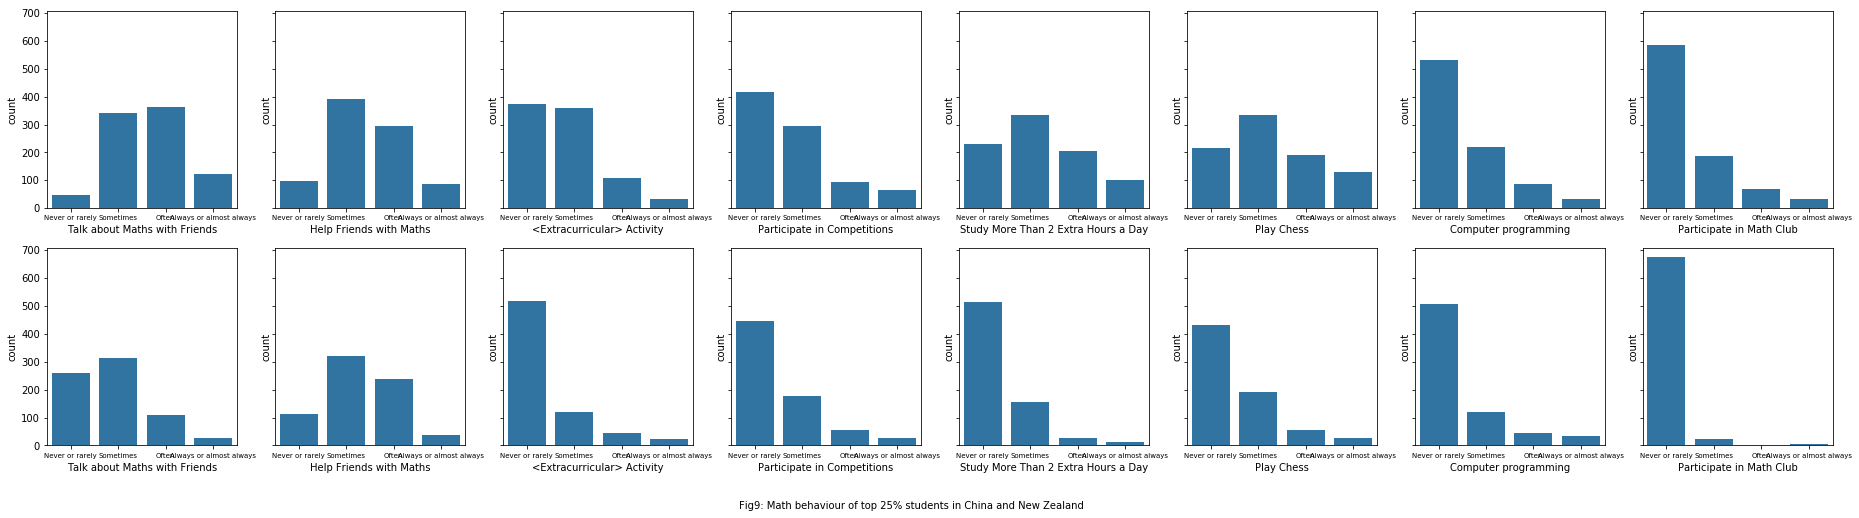

<Figure size 576x288 with 0 Axes>

In [71]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7
fig, ax = plt.subplots(nrows=2,ncols=8, sharey=True, figsize = [32,8])

default_color = sns.color_palette()[0]

sns.countplot(data = df_ch_behaviour, x = behavours_columns[0], color = default_color, ax = ax[0,0])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[1], color = default_color, ax = ax[0,1])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[2], color = default_color, ax = ax[0,2])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[3], color = default_color, ax = ax[0,3])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[4], color = default_color, ax = ax[0,4])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[5], color = default_color, ax = ax[0,5])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[6], color = default_color, ax = ax[0,6])
sns.countplot(data = df_ch_behaviour, x = behavours_columns[7], color = default_color, ax = ax[0,7])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[0], color = default_color, ax = ax[1,0])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[1], color = default_color, ax = ax[1,1])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[2], color = default_color, ax = ax[1,2])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[3], color = default_color, ax = ax[1,3])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[4], color = default_color, ax = ax[1,4])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[5], color = default_color, ax = ax[1,5])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[6], color = default_color, ax = ax[1,6])
sns.countplot(data = df_nz_behaviour, x = behavours_columns[7], color = default_color, ax = ax[1,7])

fig.text(0.5, 0.015, 'Fig9: Math behaviour of top 25% students in China and New Zealand', ha='center')

plt.show()
plt.savefig('./images/behaviour.png')

From above math behaviour countplot we can see that the top 25% students in China and New Zealand, they have similar behaviour in 4 aspects, for example,  `Help Friends with Maths`, `Participate in Competitions`, `Computer programming`, `Participate in Math Club`. However, in the other 4 aspects, Chinese students seems working harder, like doing `Extracurricular` activity, talking about math with friends, studying more than 2 extra hours, and they also play chess to increase the abstract math capability. 

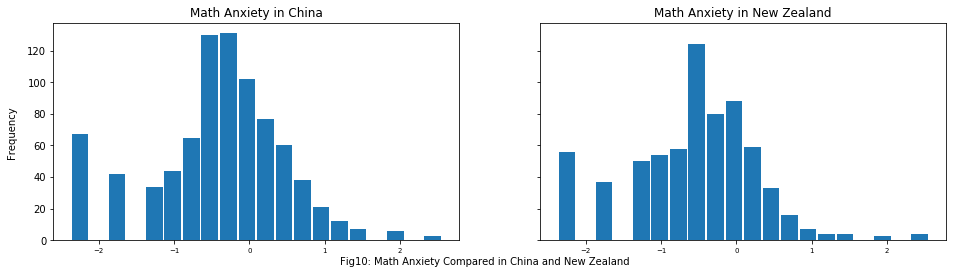

In [77]:
# Look into two numeric vars
fig, ax = plt.subplots(nrows=1,ncols=2, sharey=True, figsize = [16,4])
ax[0].hist(df_ch_top25['ANXMAT'], bins=20, rwidth=0.90)
ax[1].hist(df_nz_top25['ANXMAT'], bins=20, rwidth=0.90)
ax[0].set_title('Math Anxiety in China')
ax[1].set_title('Math Anxiety in New Zealand')

fig.text(0.5, 0.04, 'Fig10: Math Anxiety Compared in China and New Zealand', ha='center')
fig.text(0.085, 0.5, 'Frequency', va='center', rotation='vertical')
plt.show()


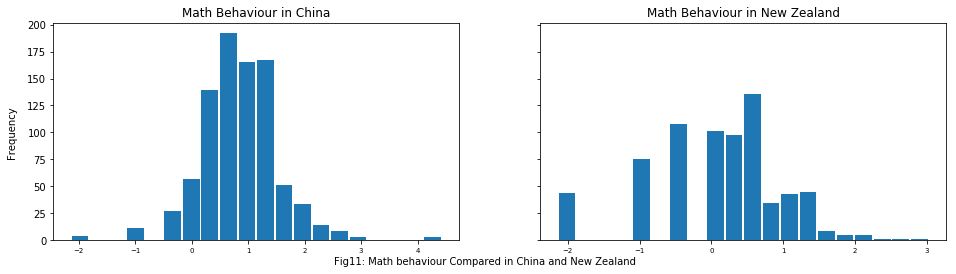

In [83]:
# MATBEH	Mathematics BehaviourANXMAT	Mathematics Anxiety

fig, ax = plt.subplots(nrows=1,ncols=2, sharey=True, figsize = [16,4])
ax[0].hist(df_ch_top25['MATBEH'], bins=20, rwidth=0.90)
ax[1].hist(df_nz_top25['MATBEH'], bins=20, rwidth=0.90)
ax[0].set_title('Math Behaviour in China')
ax[1].set_title('Math Behaviour in New Zealand')

fig.text(0.5, 0.04, 'Fig11: Math behaviour Compared in China and New Zealand', ha='center')
fig.text(0.085, 0.5, 'Frequency', va='center', rotation='vertical')

plt.show()

In [79]:
# Save data into csv file for next step work, no need everytime start from begining

df_ch_behaviour.to_csv('./dataset/pisa_ch_behaviour.csv', index=False)
df_nz_behaviour.to_csv('./dataset/pisa_nz_behaviour.csv', index=False)

df_ch_anxiety.to_csv('./dataset/pisa_cn_anxiety.csv', index=False)
df_nz_anxiety.to_csv('./dataset/pisa_nz_anxiety.csv', index=False)

df_china.to_csv('./dataset/pisa_china.csv', index=False)
df_ch_top25.to_csv('./dataset/pisa_ch_top25.csv', index=False)
df_nz.to_csv('./dataset/pisa_nz.csv', index=False)
df_nz_top25.to_csv('dataset/pisa_nz_top25.csv', index=False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The math performance is normally distributed, so there is no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No need for now.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [84]:
numeric_vars = ['MATBEH', 'ANXMAT', 'AMP']
categoric_vars_behaviour = behavours_columns
categoric_vars_anxiety = anxiety_columns

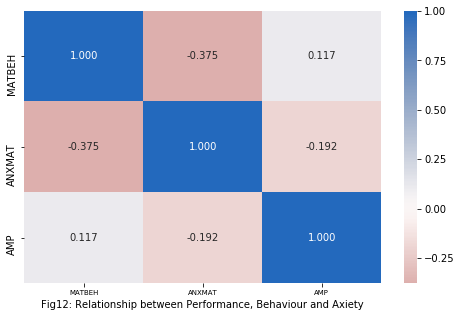

In [85]:
# correlation plot

plt.figure(figsize = [8, 5])
sns.heatmap(df_ch_top25[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.xlabel('Fig12: Relationship between Performance, Behaviour and Axiety')


plt.show()

In [29]:
df_ch_top25.reindex()
df_ch_top25.shape


(1292, 18)

Text(0.5, 0.98, 'Fig13: Relationship between Performance, Behaviour and Axiety')

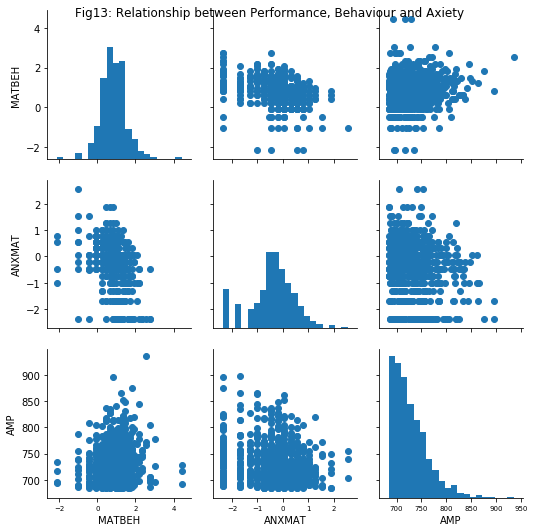

In [92]:
# plot matrix: no need sampling the data, because of only 1292 total students.

g = sns.PairGrid(data = df_ch_top25, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

g.fig.suptitle('Fig13: Relationship between Performance, Behaviour and Axiety')

Not surprised, Math Behaviour has a little negative relationship with math anxiety.

<Figure size 720x1440 with 0 Axes>

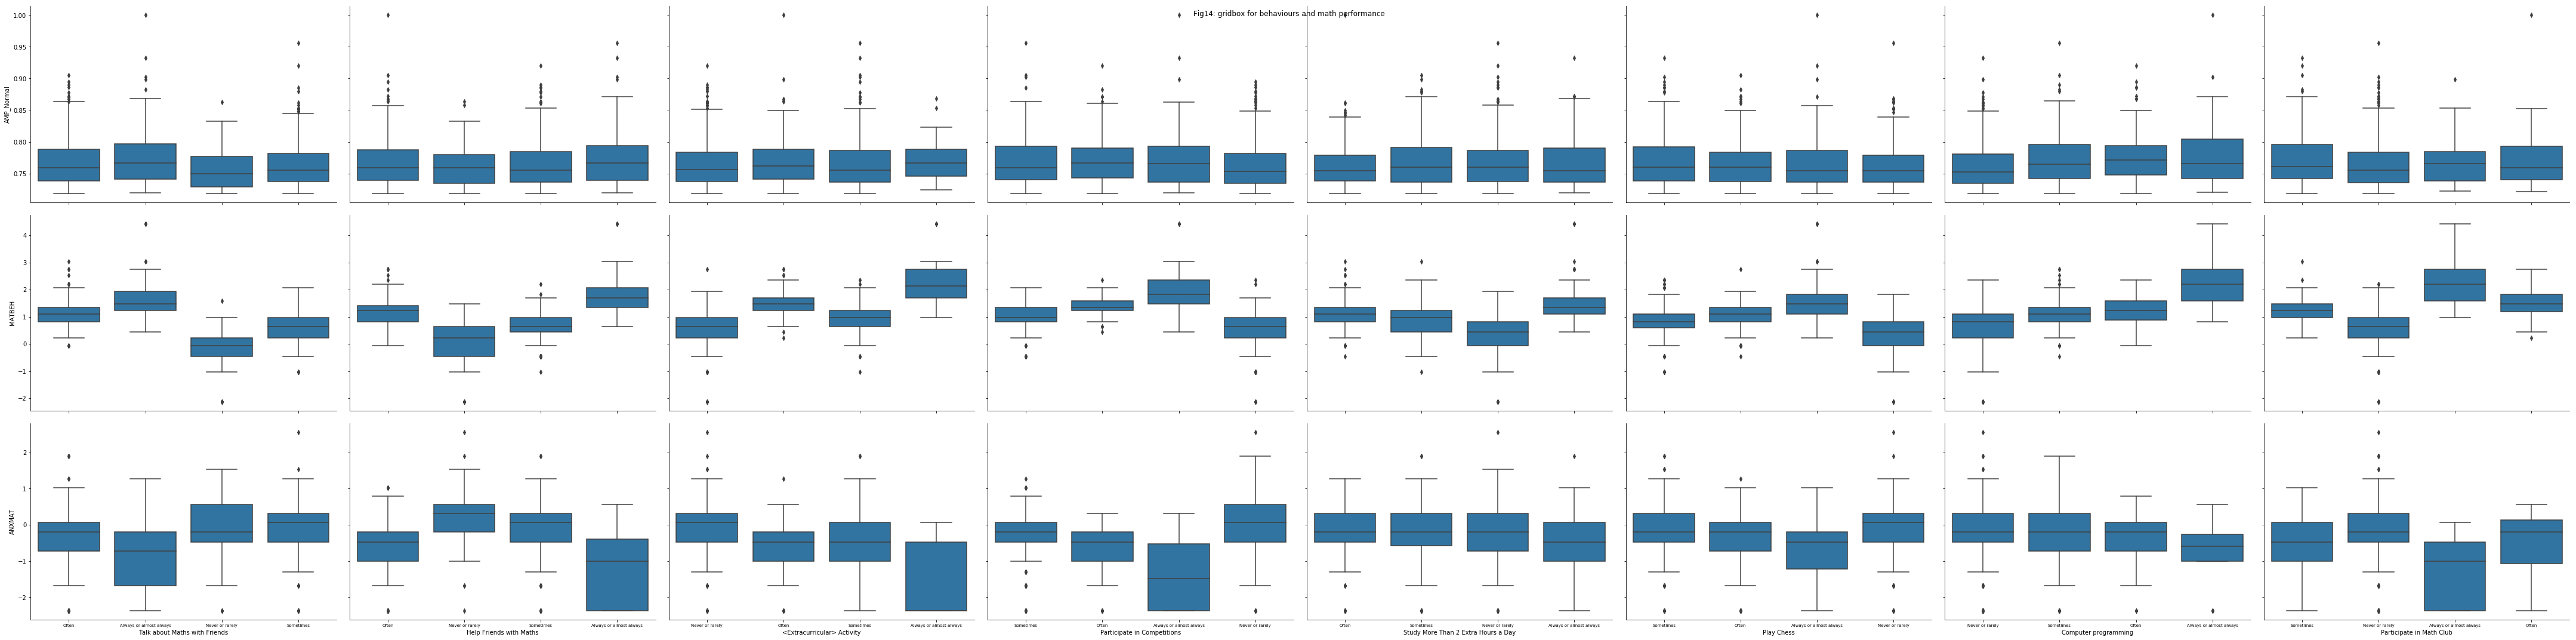

<Figure size 576x288 with 0 Axes>

In [93]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 20])

g = sns.PairGrid(data = df_ch_top25, y_vars = ['AMP_Normal', 'MATBEH', 'ANXMAT'], x_vars = categoric_vars_behaviour,
                height = 5, aspect = 1.5)
g.map(boxgrid)

g.fig.suptitle('Fig14: gridbox for behaviours and math performance ')

plt.show()
plt.savefig('./images/chtop25_behaviour.png') 


<Figure size 720x720 with 0 Axes>

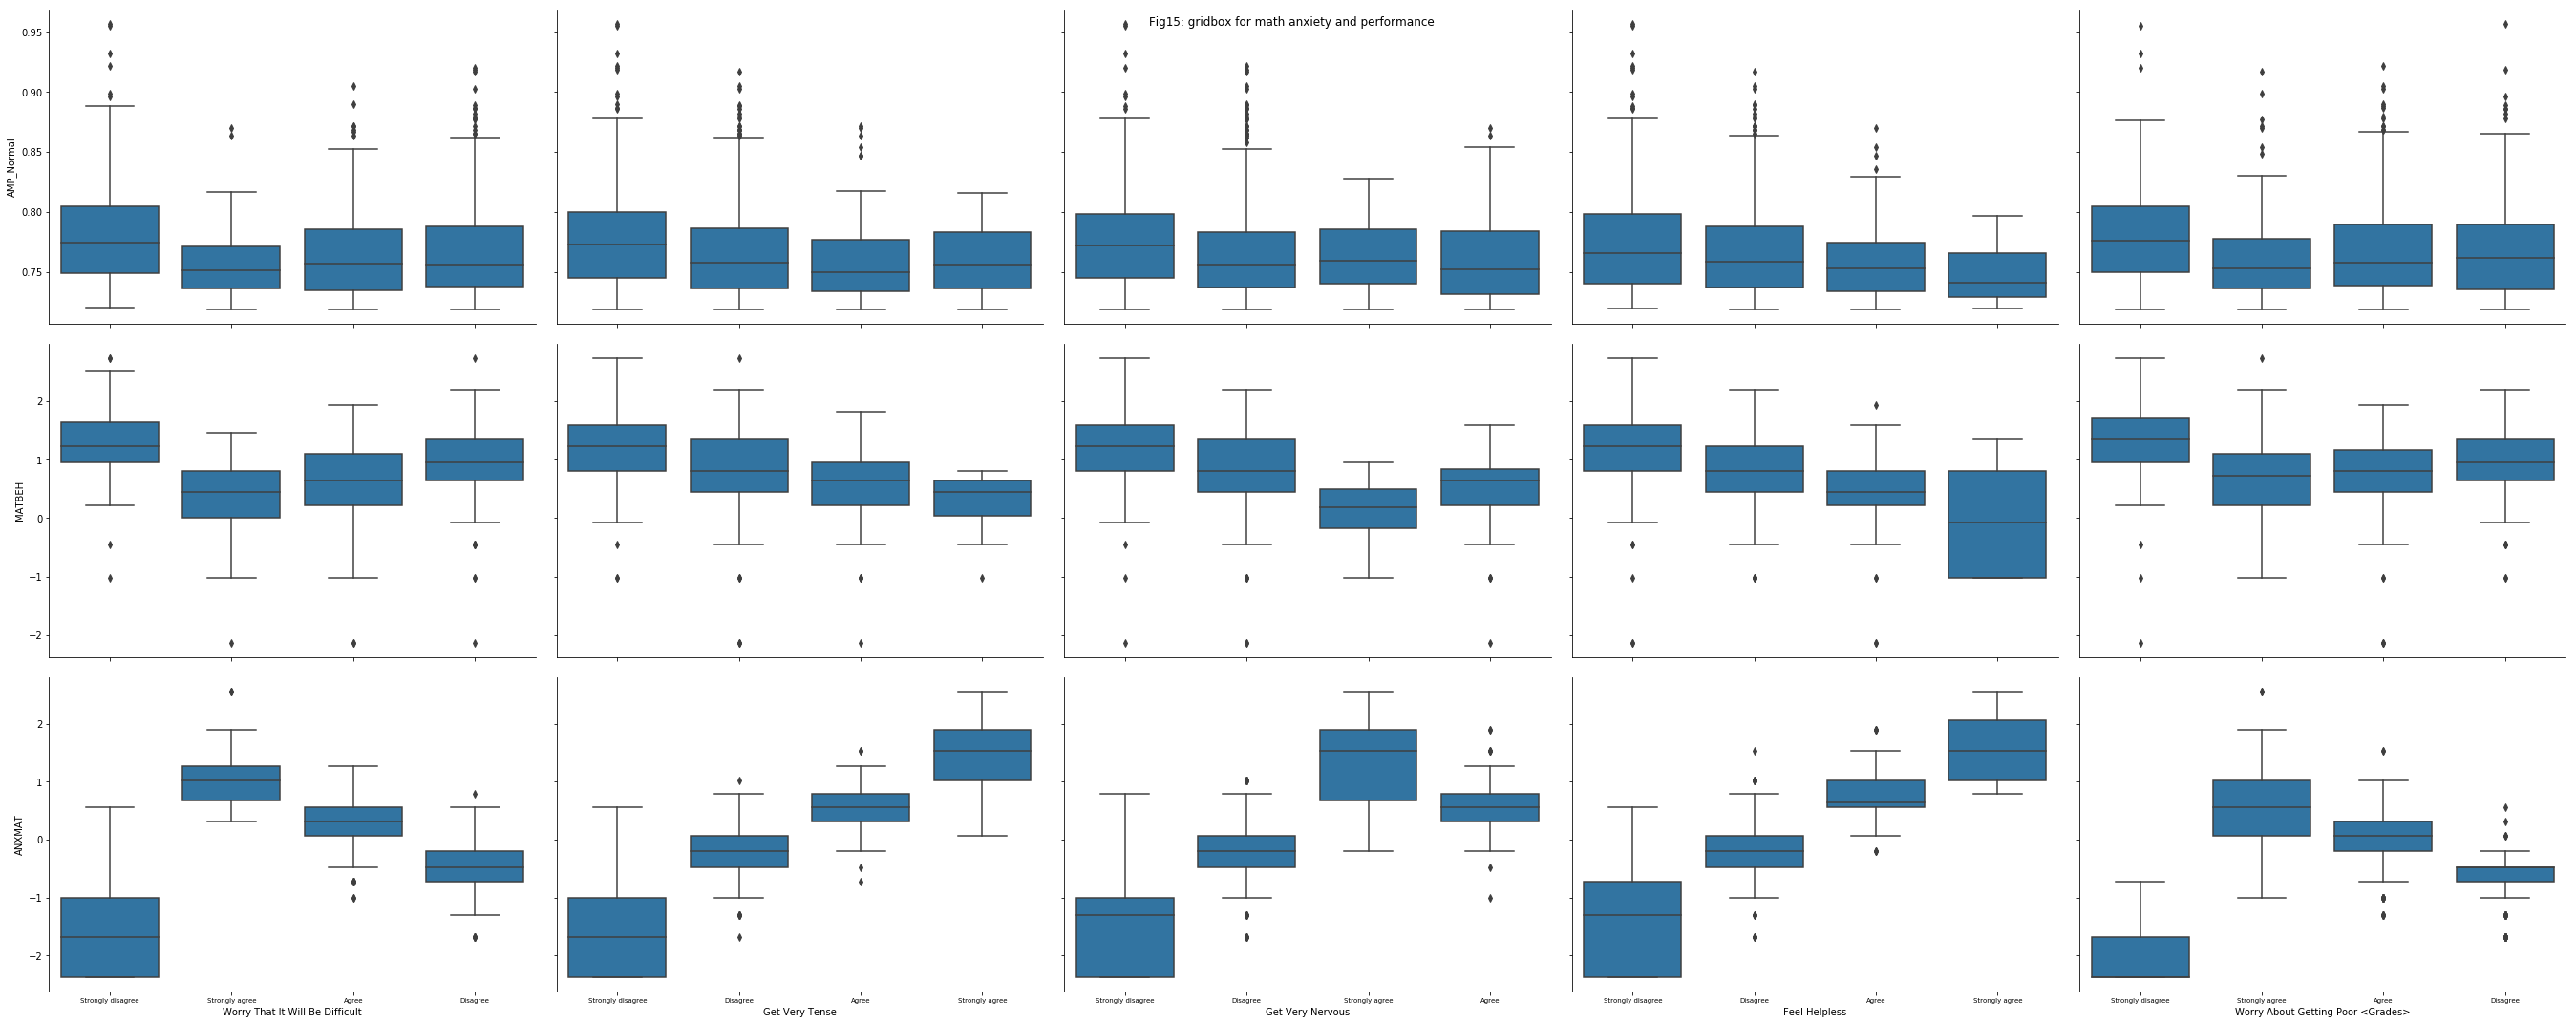

<Figure size 576x288 with 0 Axes>

In [94]:
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = df_ch_top25, y_vars = ['AMP_Normal', 'MATBEH', 'ANXMAT'], x_vars = categoric_vars_anxiety,
                height = 5, aspect = 1.5)
g.map(boxgrid)
g.fig.suptitle('Fig15: gridbox for math anxiety and performance')

plt.show()
plt.savefig('./images/chtop25_anxiety.png') 



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Math behaviour and math anxiety features don't show obvious relationship with students average math performance. But from Fig15 we can see that the less anxiety, the better the math performance.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Math behaviour has a little negative relationship with math anxiety. It does show that the harder the students work, the higher confidence they have.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [95]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [96]:
df_iod = pd.read_csv('./dataset/pisa_iod.csv')
df_iod.dropna(inplace=True)

In [97]:
df_ch_top25 = pd.read_csv('./dataset/pisa_ch_top25.csv')
df_ch_top25.dropna(inplace=True)
df_nz_top25 = pd.read_csv('./dataset/pisa_nz_top25.csv')
df_nz_top25.dropna(inplace=True)

df_ch= pd.read_csv('./dataset/pisa_china.csv')
df_ch.dropna(inplace=True)
df_nz= pd.read_csv('./dataset/pisa_nz.csv')
df_nz.dropna(inplace=True)


In [98]:
df_china.head()

,AMP,AMP_Normal,MATBEH,ANXMAT,CNT,Worry That It Will Be Difficult,Get Very Tense,Get Very Nervous,Feel Helpless,Worry About Getting Poor <Grades>,Talk about Maths with Friends,Help Friends with Maths,<Extracurricular> Activity,Participate in Competitions,Study More Than 2 Extra Hours a Day,Play Chess,Computer programming,Participate in Math Club
400217,662.026810,0.693874,0.6426,1.26,China-Shanghai,Strongly agree,Agree,Agree,Agree,Strongly agree,Often,Sometimes,Never or rarely,Sometimes,Never or rarely,Sometimes,Sometimes,Never or rarely
400218,754.019320,0.796699,1.0998,-2.37,China-Shanghai,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Often,Often,Never or rarely,Sometimes,Often,Sometimes,Never or rarely,Sometimes
400219,673.788760,0.707021,NaN,0.79,China-Shanghai,Strongly agree,Agree,Disagree,Disagree,Strongly agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400220,762.509745,0.806190,NaN,0.56,China-Shanghai,Strongly agree,Disagree,Disagree,Disagree,Strongly agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400221,736.726890,0.777370,1.0998,NaN,China-Shanghai,NaN,NaN,NaN,NaN,NaN,Often,Never or rarely,Often,Often,Sometimes,Often,Never or rarely,Never or rarely


In [99]:
# Convert math behaviour into ordered categorical types again. This order cannot be saved into the csv, so everytime we redo this.
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['Never or rarely','Sometimes','Often', 'Always or almost always'])
df_ch_top25.iloc[:,-8:] = df_ch_top25.iloc[:,-8:].astype(ordered_var)
df_nz_top25.iloc[:,-8:] = df_nz_top25.iloc[:,-8:].astype(ordered_var)
df_china.iloc[:,-8:] = df_china.iloc[:,-8:].astype(ordered_var)
df_nz.iloc[:,-8:] = df_nz.iloc[:,-8:].astype(ordered_var)

# Convert math anxiety into ordered categorical types

ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ['Strongly disagree','Disagree','Agree','Strongly agree'])
df_ch_top25.iloc[:,5:9] = df_ch_top25.iloc[:,5:9].astype(ordered_var)
df_nz_top25.iloc[:,5:9] = df_nz_top25.iloc[:,5:9].astype(ordered_var)

df_china.iloc[:,5:9] = df_china.iloc[:,5:9].astype(ordered_var)
df_nz.iloc[:,5:9] = df_nz.iloc[:,5:9].astype(ordered_var)

In [100]:
categoric_vars_behaviour = df_ch_top25.iloc[:,-8:].columns.tolist()
categoric_vars_anxiety = df_ch_top25.iloc[:,5:9].columns.tolist()
print(categoric_vars_behaviour)
print()
print(categoric_vars_anxiety)

['Talk about Maths with Friends', 'Help Friends with Maths', '<Extracurricular> Activity', 'Participate in Competitions', 'Study More Than 2 Extra Hours a Day', 'Play Chess', 'Computer programming', 'Participate in Math Club']

['Worry That It Will Be Difficult', 'Get Very Tense', 'Get Very Nervous', 'Feel Helpless']


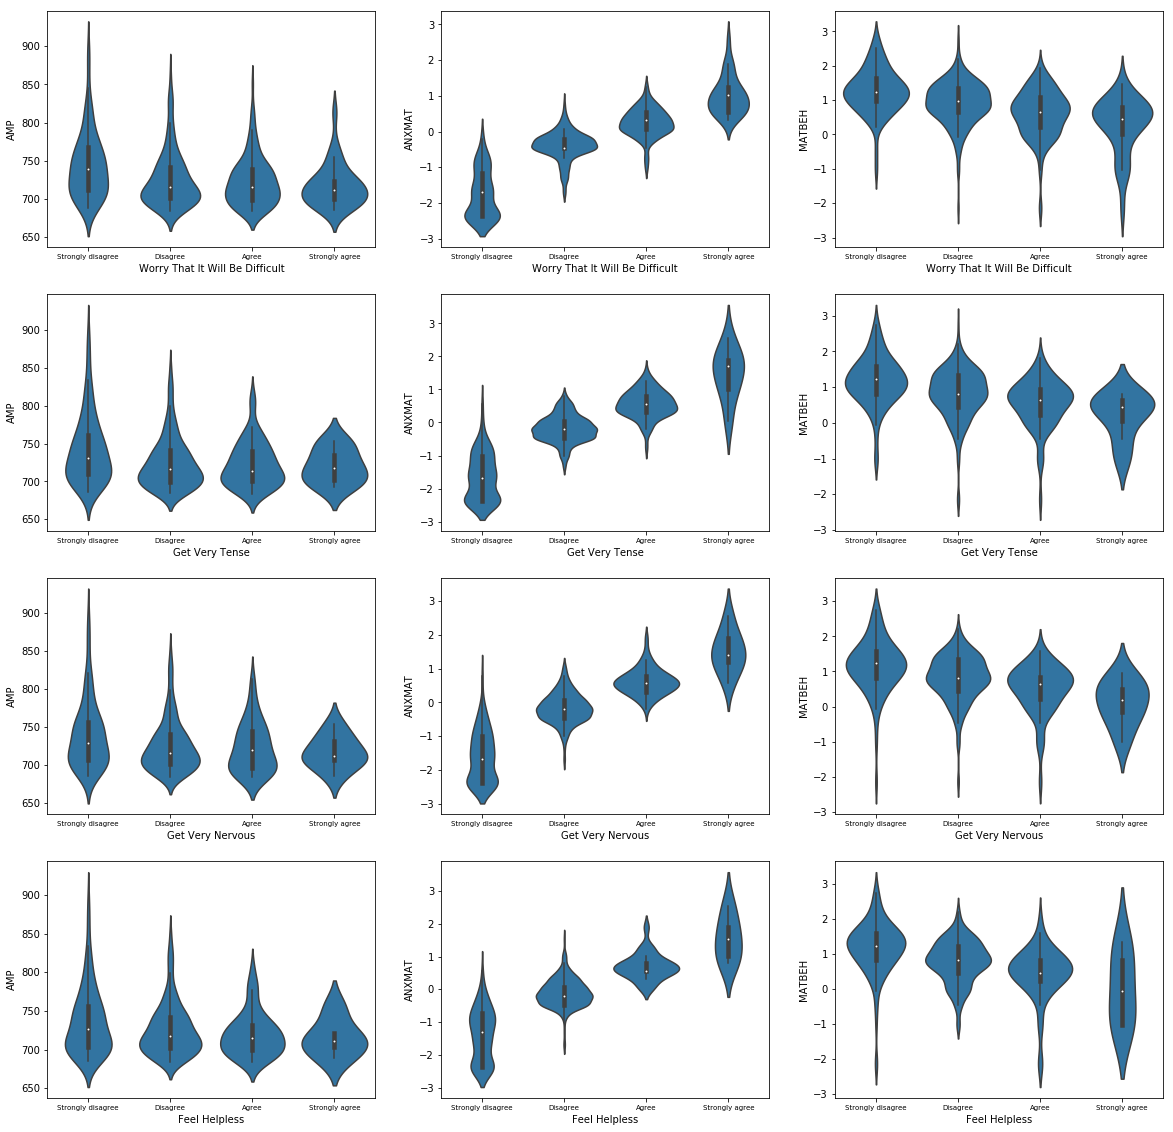

<Figure size 432x288 with 0 Axes>

In [101]:
# plot the categorical variables against AMP and ANXMAT,  MATBEH again

fig, ax = plt.subplots(ncols = 3, nrows = len(categoric_vars_anxiety) , figsize = [20,20])
default_color = sns.color_palette()[0]

for i in range(len(categoric_vars_anxiety)):
    var = categoric_vars_anxiety[i]
    sns.violinplot(data = df_ch_top25, x = var, y = 'AMP', ax = ax[i,0],
               color = default_color)

    sns.violinplot(data = df_ch_top25, x = var, y = 'ANXMAT', ax = ax[i,1],
               color = default_color)
    
    sns.violinplot(data = df_ch_top25, x = var, y = 'MATBEH', ax = ax[i,2],
               color = default_color)
plt.show()
plt.savefig('./images/violin_ch_top25_anxiety.png')

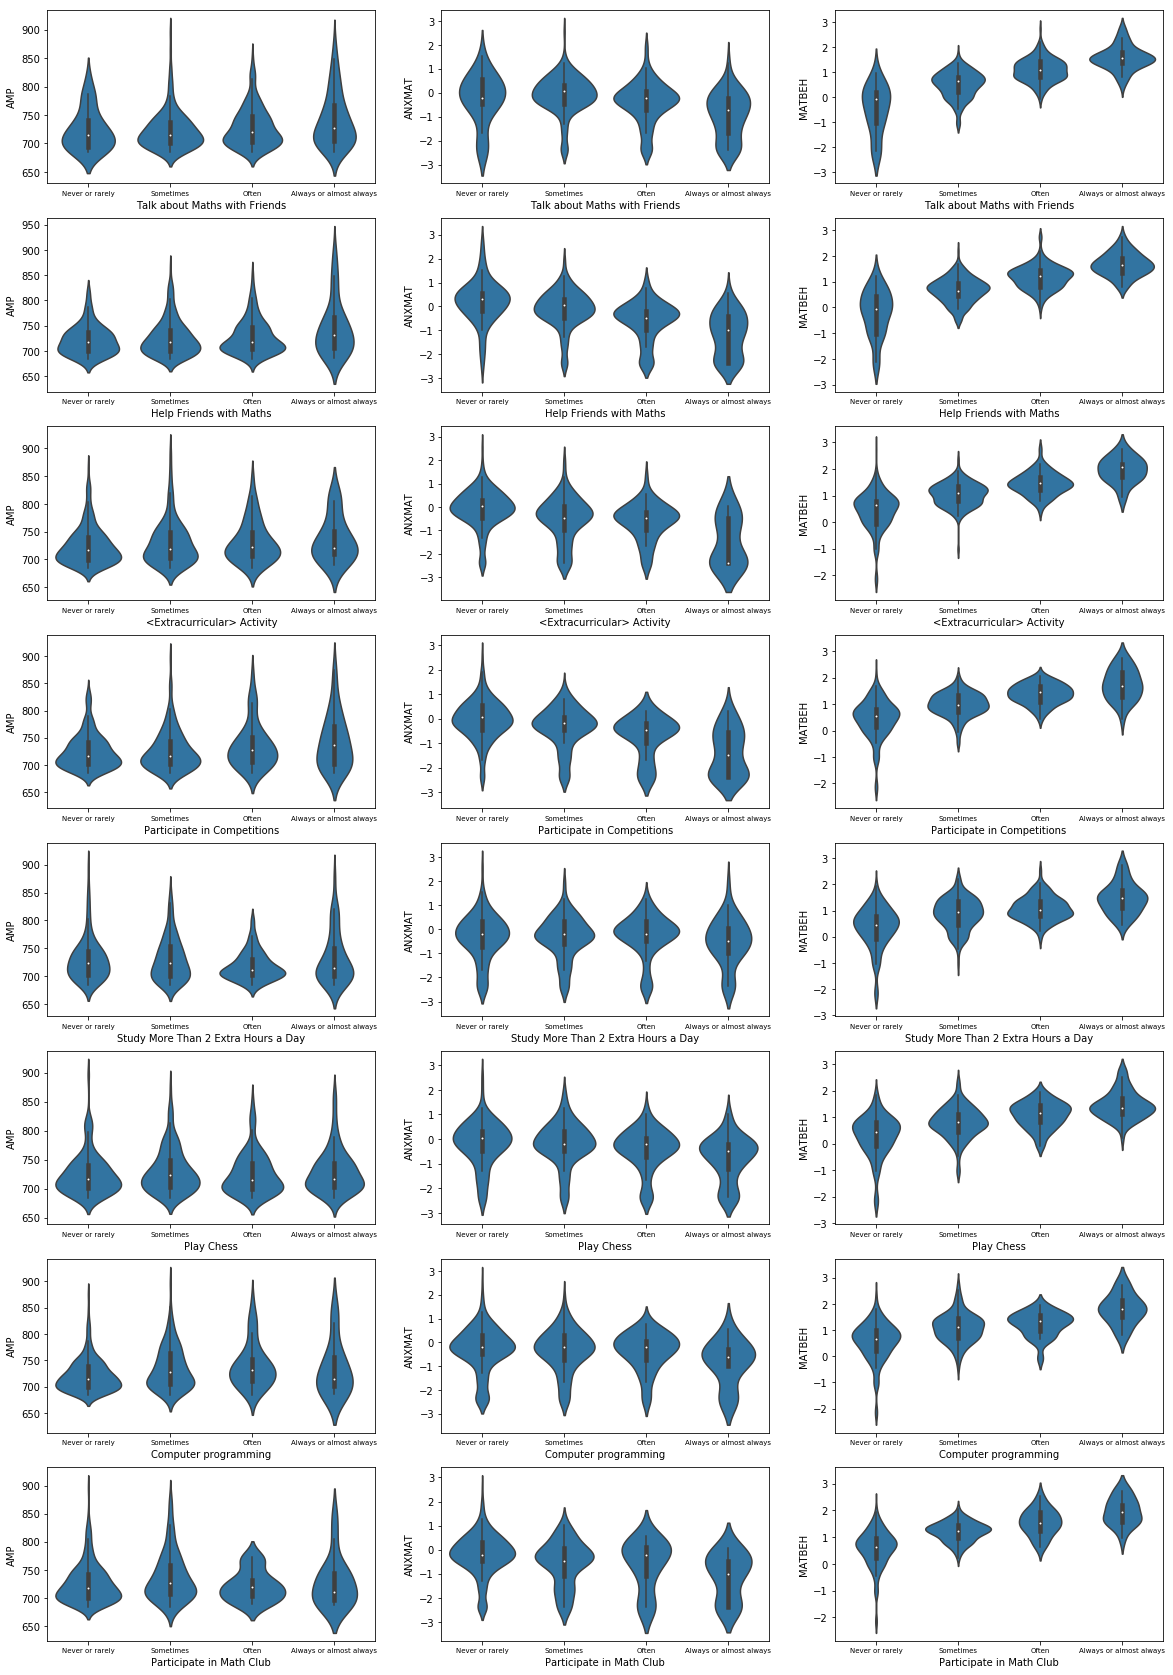

<Figure size 432x288 with 0 Axes>

In [102]:
# plot the categorical variables against AMP and ANXMAT,  MATBEH again

fig, ax = plt.subplots(ncols = 3, nrows = len(categoric_vars_behaviour) , figsize = [20,30])

for i in range(len(categoric_vars_behaviour)):
    var = categoric_vars_behaviour[i]
    sns.violinplot(data = df_ch_top25, x = var, y = 'AMP', ax = ax[i,0],
               color = default_color)

    
    sns.violinplot(data = df_ch_top25, x = var, y = 'ANXMAT', ax = ax[i,1],
               color = default_color)
    
    sns.violinplot(data = df_ch_top25, x = var, y = 'MATBEH', ax = ax[i,2],
               color = default_color)

plt.show()

plt.savefig('./images/violin_ch_top25_behaviour.png')

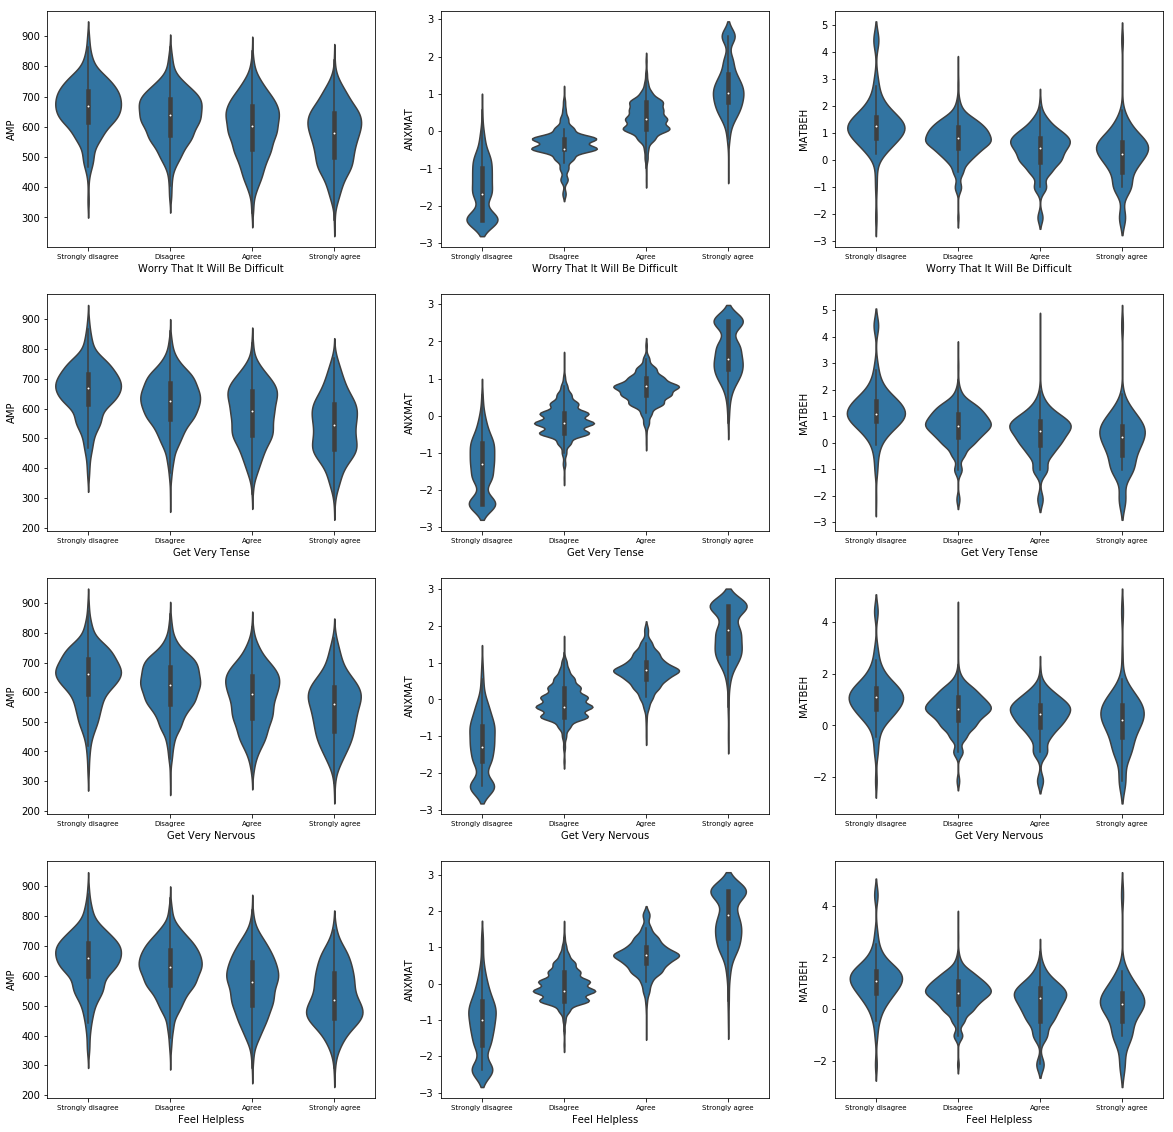

<Figure size 432x288 with 0 Axes>

In [103]:
# violin plot: numeric data against math anxiety for the whole students in China

fig, ax = plt.subplots(ncols = 3, nrows = len(categoric_vars_anxiety) , figsize = [20,20])

for i in range(len(categoric_vars_anxiety)):
    var = categoric_vars_anxiety[i]
    sns.violinplot(data = df_china, x = var, y = 'AMP', ax = ax[i,0],
               color = default_color)

    sns.violinplot(data = df_china, x = var, y = 'ANXMAT', ax = ax[i,1],
               color = default_color)
    
    sns.violinplot(data = df_china, x = var, y = 'MATBEH', ax = ax[i,2],
               color = default_color)

plt.show()
plt.savefig('./images/violin_ch_anxiety.png')

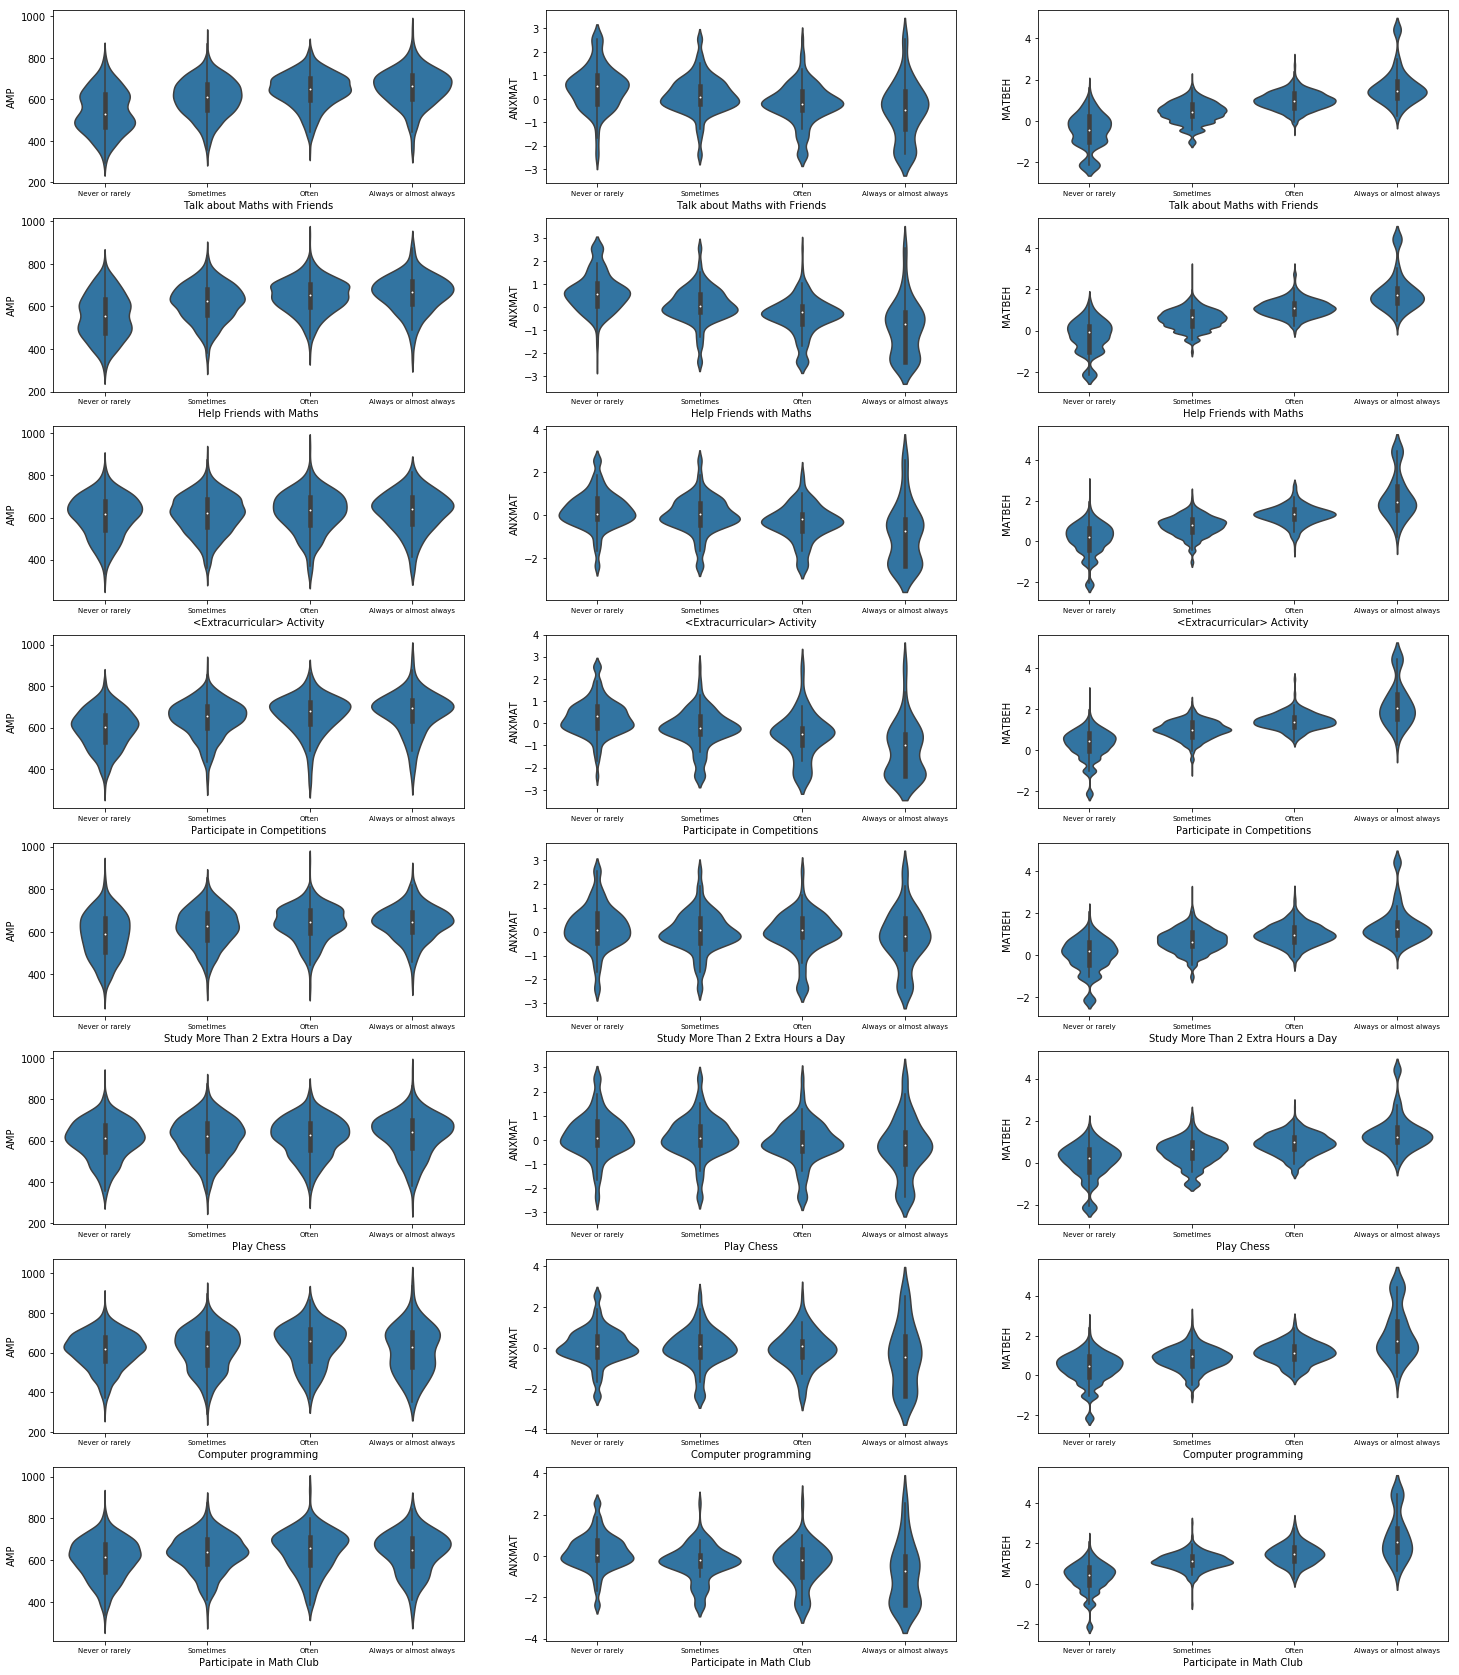

<Figure size 432x288 with 0 Axes>

In [107]:
# violin plot: numeric data against math behaviour for the whole students in China

fig, ax = plt.subplots(ncols = 3, nrows = len(categoric_vars_behaviour) , figsize = [25,30])

for i in range(len(categoric_vars_behaviour)):
    var = categoric_vars_behaviour[i]
    sns.violinplot(data = df_china, x = var, y = 'AMP', ax = ax[i,0],
               color = default_color)

    sns.violinplot(data = df_china, x = var, y = 'ANXMAT', ax = ax[i,1],
               color = default_color)
    
    sns.violinplot(data = df_china, x = var, y = 'MATBEH', ax = ax[i,2],
               color = default_color)

plt.show()
plt.savefig('./images/violin_ch_behaviour.png')

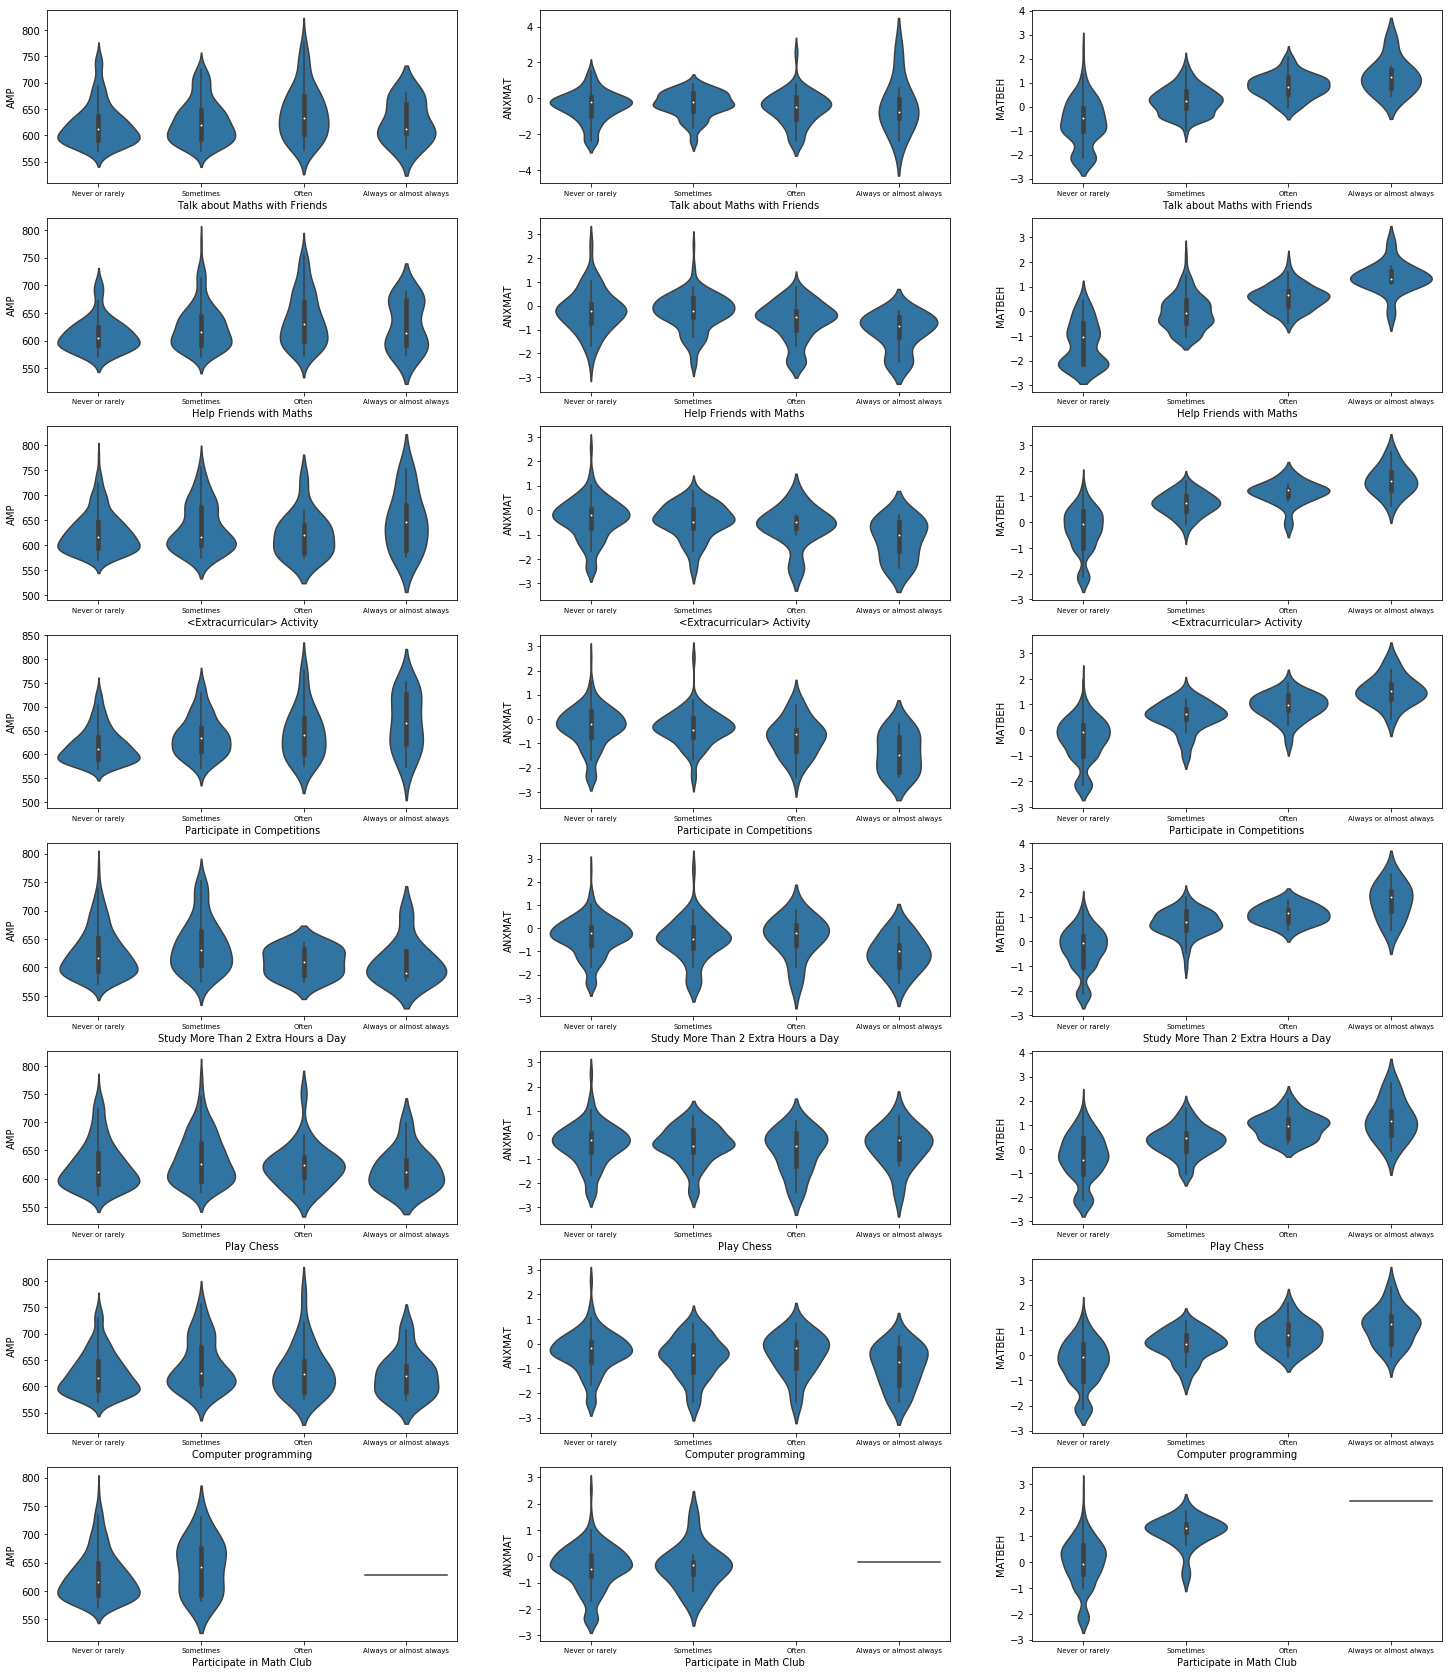

<Figure size 432x288 with 0 Axes>

In [105]:
# violin plot: numeric data against math behaviour for the top 25% students in New Zealand

fig, ax = plt.subplots(ncols = 3, nrows = len(categoric_vars_behaviour) , figsize = [25,30])

for i in range(len(categoric_vars_behaviour)):
    var = categoric_vars_behaviour[i]
    sns.violinplot(data = df_nz_top25, x = var, y = 'AMP', ax = ax[i,0],
               color = default_color)

    
    sns.violinplot(data = df_nz_top25, x = var, y = 'ANXMAT', ax = ax[i,1],
               color = default_color)
    
    sns.violinplot(data = df_nz_top25, x = var, y = 'MATBEH', ax = ax[i,2],
               color = default_color)

plt.show()
plt.savefig('./images/violin_nz_top25_behaviour.png')

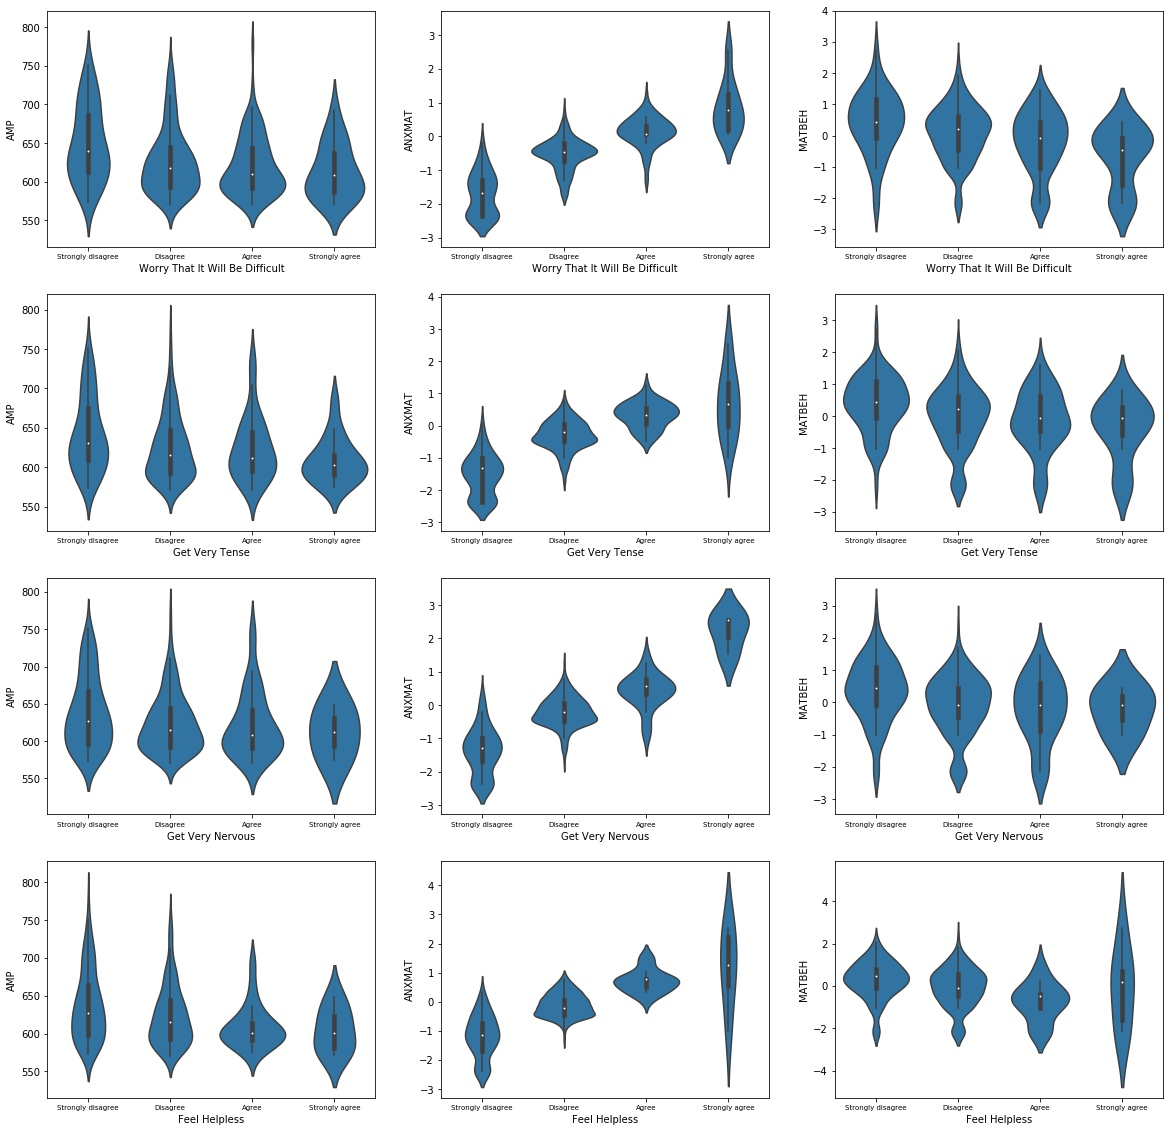

<Figure size 432x288 with 0 Axes>

In [106]:
# violin plot: numeric data against math anxiety for the top 25% students in New Zealand

fig, ax = plt.subplots(ncols = 3, nrows = len(categoric_vars_anxiety) , figsize = [20,20])

for i in range(len(categoric_vars_anxiety)):
    var = categoric_vars_anxiety[i]
    sns.violinplot(data = df_nz_top25, x = var, y = 'AMP', ax = ax[i,0],
               color = default_color)

    sns.violinplot(data = df_nz_top25, x = var, y = 'ANXMAT', ax = ax[i,1],
               color = default_color)
    
    sns.violinplot(data = df_nz_top25, x = var, y = 'MATBEH', ax = ax[i,2],
               color = default_color)

plt.show()
plt.savefig('./images/violin_nz_top25_anxiety.png')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  To top 25% student wherever they are in NZ or China, they still have a lot of anxiety and worries. But we can see from the violin plot we will see that the more they disagreed the anxiety, the better the academic performance they got. But doing more math activities cannot improve math grade more!

### Were there any interesting or surprising interactions between features?

> Yes. From the violin plot, we can learn that always to help friends study math and talk math with friends are two effective ways to improve their math performance. So the study buddy is a really good approach to help students with each other.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!